# EXAM 2023: Economics of Financial Markets

In [1]:
#pip install panda
#pip install numpy
#pip install seaborn
# #pip install matplotlib
#pip install cvxpy
#pip install PyPortfolioOpt
#pip install scipy

#pip install riskfolio


In [2]:
#import the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
import cvxpy as cp
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import CLA, plotting
from pypfopt.expected_returns import ema_historical_return
from scipy.stats import skew,kurtosis
import scipy.stats as sc

import riskfolio as rp


In [3]:
from pypfopt import (
    CLA,
    BlackLittermanModel,
    EfficientFrontier,
    HRPOpt,
    black_litterman,
    expected_returns,
    plotting,
    risk_models,
)

In [4]:
#FIRST POINT STARTED

In [5]:
#import the 'stocks daily' worksheet from Excel into Python
data_daily = pd.read_excel("data_for_exam_2023.xlsx", sheet_name="stocks_daily")
data_daily = data_daily.rename(columns={data_daily.columns[0]: "price_date"})
#data_daily.set_index("price_date", inplace = True)
data_daily

,price_date,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
0,Code,I:LDO,I:ECK,I:LRZ,I:PIRL,I:STL,I:PINF,I:BRE,I:ISP,I:ILLB,...,I:GAB,I:MS,I:ERG,I:CMB,I:SAB,I:BE,I:SOL,I:DAL,I:BSS,I:SAFI
1,CURRENCY,E,E,E,E,E,E,E,E,E,...,E,E,E,E,E,E,E,E,E,E
2,2015-01-01 00:00:00,7.735,13.6,0.9168,NaN,4.9744,2.2126,5.54,2.422,NaN,...,0.8245,1.9196,9.255,10.21,11.17,0.4015,6.655,8.9,9.36,6.0116
3,2015-01-02 00:00:00,7.73,13.6,0.9186,NaN,5.0132,2.2533,5.566,2.454,NaN,...,0.818,1.9151,9.41,10.4,11.17,0.3985,6.665,8.88,9.57,6.1009
4,2015-01-05 00:00:00,7.43,13.6,0.9219,NaN,4.9044,2.2083,5.51,2.308,NaN,...,0.796,1.8202,9.11,10.43,11.11,0.395,6.73,8.84,9.96,5.9224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,2023-06-28 00:00:00,10.3,20.5,0.536,4.495,15.47,0.866,13.32,2.3635,6.275,...,0.941,0.707,26.24,29.4,14,0.26,26.05,6.95,11.81,1.239
2217,2023-06-29 00:00:00,10.43,20.6,0.536,4.498,16.02,0.842,13.42,2.386,6.32,...,0.913,0.711,26.02,29.6,14,0.26,26,6.92,11.83,1.255
2218,2023-06-30 00:00:00,10.395,20.1,0.547,4.524,16.09,0.844,13.58,2.4,6.35,...,0.913,0.7025,26.98,30.6,14.28,0.26,26.45,6.95,12.06,1.242
2219,2023-07-03 00:00:00,10.44,20.1,0.545,4.564,16.292,0.866,13.53,2.437,6.36,...,0.919,0.703,27.02,30,14.4,0.255,26.4,6.895,11.88,1.245


In [6]:
#import the 'stocks daily' worksheet from Excel into Python
data_daily = pd.read_excel("data_for_exam_2023.xlsx", sheet_name="stocks_daily")
data_daily = data_daily.rename(columns={data_daily.columns[0]: "price_date"})
#data_daily.set_index("price_date", inplace = True)
data_daily

,price_date,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
0,Code,I:LDO,I:ECK,I:LRZ,I:PIRL,I:STL,I:PINF,I:BRE,I:ISP,I:ILLB,...,I:GAB,I:MS,I:ERG,I:CMB,I:SAB,I:BE,I:SOL,I:DAL,I:BSS,I:SAFI
1,CURRENCY,E,E,E,E,E,E,E,E,E,...,E,E,E,E,E,E,E,E,E,E
2,2015-01-01 00:00:00,7.735,13.6,0.9168,NaN,4.9744,2.2126,5.54,2.422,NaN,...,0.8245,1.9196,9.255,10.21,11.17,0.4015,6.655,8.9,9.36,6.0116
3,2015-01-02 00:00:00,7.73,13.6,0.9186,NaN,5.0132,2.2533,5.566,2.454,NaN,...,0.818,1.9151,9.41,10.4,11.17,0.3985,6.665,8.88,9.57,6.1009
4,2015-01-05 00:00:00,7.43,13.6,0.9219,NaN,4.9044,2.2083,5.51,2.308,NaN,...,0.796,1.8202,9.11,10.43,11.11,0.395,6.73,8.84,9.96,5.9224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2216,2023-06-28 00:00:00,10.3,20.5,0.536,4.495,15.47,0.866,13.32,2.3635,6.275,...,0.941,0.707,26.24,29.4,14,0.26,26.05,6.95,11.81,1.239
2217,2023-06-29 00:00:00,10.43,20.6,0.536,4.498,16.02,0.842,13.42,2.386,6.32,...,0.913,0.711,26.02,29.6,14,0.26,26,6.92,11.83,1.255
2218,2023-06-30 00:00:00,10.395,20.1,0.547,4.524,16.09,0.844,13.58,2.4,6.35,...,0.913,0.7025,26.98,30.6,14.28,0.26,26.45,6.95,12.06,1.242
2219,2023-07-03 00:00:00,10.44,20.1,0.545,4.564,16.292,0.866,13.53,2.437,6.36,...,0.919,0.703,27.02,30,14.4,0.255,26.4,6.895,11.88,1.245


In [7]:
data_monthly = pd.read_excel("data_for_exam_2023.xlsx", sheet_name="stocks_monthly")
data_monthly = data_monthly.rename(columns={data_monthly.columns[0]: "price_date"})
#data_monthly.set_index("price_date", inplace = True)
data_monthly

,price_date,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
0,Code,I:LDO,I:ECK,I:LRZ,I:PIRL,I:STL,I:PINF,I:BRE,I:ISP,I:ILLB,...,I:GAB,I:MS,I:ERG,I:CMB,I:SAB,I:BE,I:SOL,I:DAL,I:BSS,I:SAFI
1,CURRENCY,E,E,E,E,E,E,E,E,E,...,E,E,E,E,E,E,E,E,E,E
2,2015-01-01 00:00:00,7.735,13.6,0.9168,NaN,4.9744,2.2126,5.54,2.422,NaN,...,0.8245,1.9196,9.255,10.21,11.17,0.4015,6.655,8.9,9.36,6.0116
3,2015-02-01 00:00:00,9.655,13.85,0.9677,NaN,6.0833,2.6003,6.254,2.564,NaN,...,0.8405,2.2354,10.55,11.51,11.9,0.401,6.8,10.13,12.7,7.1995
4,2015-03-01 00:00:00,10.83,13.89,0.9483,NaN,7.3061,2.9037,6.84,2.946,NaN,...,0.893,2.3001,11.35,11.77,12.55,0.415,6.98,10.55,16.51,7.7627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,2023-03-01 00:00:00,10.62,19.2,0.562,4.891,17.056,0.87,14.64,2.537,6.605,...,1.156,0.666,26.66,29.4,16.78,0.2985,24.25,8.735,17.43,1.386
101,2023-04-01 00:00:00,10.955,19.25,0.568,4.626,16.67,0.824,13.7,2.365,6.165,...,1.11,0.63,27.7,30.5,16.34,0.274,25,7.815,14.65,1.407
102,2023-05-01 00:00:00,10.805,18.8,0.556,4.746,15,0.82,13.31,2.3845,6.395,...,1.02,0.668,27.4,30.3,16.5,0.26,26.2,7.515,13.82,1.305
103,2023-06-01 00:00:00,10.33,20,0.503,4.467,14.384,0.8,14.42,2.23,6.35,...,0.779,0.65,25.76,32,15.2,0.2495,25.8,6.825,11.76,1.18


In [8]:
#remove the second and third rows and the first column as values not useful in the calculation of statistics (daily)
cleaned_df_daily = data_daily.iloc[2:,:]
cleaned_df_daily.set_index("price_date", inplace = True)
cleaned_df_daily

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
price_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,7.735,13.6,0.9168,NaN,4.9744,2.2126,5.54,2.422,NaN,25.1131,...,0.8245,1.9196,9.255,10.21,11.17,0.4015,6.655,8.9,9.36,6.0116
2015-01-02,7.73,13.6,0.9186,NaN,5.0132,2.2533,5.566,2.454,NaN,25.5838,...,0.818,1.9151,9.41,10.4,11.17,0.3985,6.665,8.88,9.57,6.1009
2015-01-05,7.43,13.6,0.9219,NaN,4.9044,2.2083,5.51,2.308,NaN,23.8892,...,0.796,1.8202,9.11,10.43,11.11,0.395,6.73,8.84,9.96,5.9224
2015-01-06,7.35,13.6,0.9122,NaN,4.9822,2.2027,5.422,2.276,NaN,23.5597,...,0.796,1.77,9.09,10.59,11.05,0.391,6.71,8.8,10.39,5.7941
2015-01-07,7.465,13.6,0.9191,NaN,5.0262,2.2196,5.364,2.248,NaN,23.329,...,0.7995,1.7722,9.105,10.43,10.94,0.393,6.86,8.85,10.14,5.8555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,10.3,20.5,0.536,4.495,15.47,0.866,13.32,2.3635,6.275,20.57,...,0.941,0.707,26.24,29.4,14,0.26,26.05,6.95,11.81,1.239
2023-06-29,10.43,20.6,0.536,4.498,16.02,0.842,13.42,2.386,6.32,21.12,...,0.913,0.711,26.02,29.6,14,0.26,26,6.92,11.83,1.255
2023-06-30,10.395,20.1,0.547,4.524,16.09,0.844,13.58,2.4,6.35,21.265,...,0.913,0.7025,26.98,30.6,14.28,0.26,26.45,6.95,12.06,1.242


In [9]:
#remove the second and third rows and the first column as values not useful in the calculation of statistics (monthly)
cleaned_df_monthly = data_monthly.iloc[2:,:]
cleaned_df_monthly.set_index("price_date", inplace = True)
cleaned_df_monthly

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
price_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,7.735,13.6,0.9168,NaN,4.9744,2.2126,5.54,2.422,NaN,25.1131,...,0.8245,1.9196,9.255,10.21,11.17,0.4015,6.655,8.9,9.36,6.0116
2015-02-01,9.655,13.85,0.9677,NaN,6.0833,2.6003,6.254,2.564,NaN,24.9719,...,0.8405,2.2354,10.55,11.51,11.9,0.401,6.8,10.13,12.7,7.1995
2015-03-01,10.83,13.89,0.9483,NaN,7.3061,2.9037,6.84,2.946,NaN,27.8903,...,0.893,2.3001,11.35,11.77,12.55,0.415,6.98,10.55,16.51,7.7627
2015-04-01,11.36,13.67,1.0557,NaN,7.8347,4.0107,7.576,3.202,NaN,30.1263,...,1.388,2.4597,12.45,14.46,12.85,0.473,8.14,10.93,15.64,8.0527
2015-05-01,11.45,11.8,1.0029,NaN,6.9175,3.5225,7.14,3.016,NaN,30.3616,...,1.177,2.5747,12.83,14.46,12.39,0.469,7.8,11.55,14.4,7.2608
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,10.62,19.2,0.562,4.891,17.056,0.87,14.64,2.537,6.605,18.872,...,1.156,0.666,26.66,29.4,16.78,0.2985,24.25,8.735,17.43,1.386
2023-04-01,10.955,19.25,0.568,4.626,16.67,0.824,13.7,2.365,6.165,17.93,...,1.11,0.63,27.7,30.5,16.34,0.274,25,7.815,14.65,1.407
2023-05-01,10.805,18.8,0.556,4.746,15,0.82,13.31,2.3845,6.395,17.94,...,1.02,0.668,27.4,30.3,16.5,0.26,26.2,7.515,13.82,1.305


In [10]:
#calculate returns as a percentage change in prices (daily)
solution_daily= cleaned_df_daily.pct_change(periods=1)
solution_daily

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
price_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.000646,0.000000,0.001963,NaN,0.007800,0.018395,0.004693,0.013212,NaN,0.018743,...,-0.007884,-0.002344,0.016748,0.018609,0.000000,-0.007472,0.001503,-0.002247,0.022436,0.014855
2015-01-05,-0.038810,0.000000,0.003592,NaN,-0.021703,-0.019971,-0.010061,-0.059495,NaN,-0.066237,...,-0.026895,-0.049554,-0.031881,0.002885,-0.005372,-0.008783,0.009752,-0.004505,0.040752,-0.029258
2015-01-06,-0.010767,0.000000,-0.010522,NaN,0.015863,-0.002536,-0.015971,-0.013865,NaN,-0.013793,...,0.000000,-0.027579,-0.002195,0.015340,-0.005401,-0.010127,-0.002972,-0.004525,0.043173,-0.021664
2015-01-07,0.015646,0.000000,0.007564,NaN,0.008831,0.007672,-0.010697,-0.012302,NaN,-0.009792,...,0.004397,0.001243,0.001650,-0.015109,-0.009955,0.005115,0.022355,0.005682,-0.024062,0.010597
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,0.013780,0.053985,-0.012891,0.010112,0.010187,0.053528,0.015244,0.000847,-0.013365,-0.000486,...,0.045556,0.028364,0.015480,0.006849,0.000000,0.003861,0.021569,0.029630,0.001696,0.000000
2023-06-29,0.012621,0.004878,0.000000,0.000667,0.035553,-0.027714,0.007508,0.009520,0.007171,0.026738,...,-0.029756,0.005658,-0.008384,0.006803,0.000000,0.000000,-0.001919,-0.004317,0.001693,0.012914
2023-06-30,-0.003356,-0.024272,0.020522,0.005780,0.004370,0.002375,0.011923,0.005868,0.004747,0.006866,...,0.000000,-0.011955,0.036895,0.033784,0.020000,0.000000,0.017308,0.004335,0.019442,-0.010359


In [11]:
#calculate returns as a percentage change in prices (monthly)
solution_monthly= cleaned_df_monthly.pct_change(periods=1)
solution_monthly

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
price_date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,0.248222,0.018382,0.055519,NaN,0.222921,0.175224,0.128881,0.058629,NaN,-0.005623,...,0.019406,0.164513,0.139924,0.127326,0.065354,-0.001245,0.021788,0.138202,0.356838,0.197601
2015-03-01,0.121699,0.002888,-0.020048,NaN,0.201009,0.116679,0.093700,0.148986,NaN,0.116867,...,0.062463,0.028943,0.075829,0.022589,0.054622,0.034913,0.026471,0.041461,0.300000,0.078228
2015-04-01,0.048938,-0.015839,0.113255,NaN,0.072351,0.381238,0.107602,0.086897,NaN,0.080171,...,0.554311,0.069388,0.096916,0.228547,0.023904,0.139759,0.166189,0.036019,-0.052695,0.037358
2015-05-01,0.007923,-0.136796,-0.050014,NaN,-0.117069,-0.121724,-0.057550,-0.058089,NaN,0.007810,...,-0.152017,0.046754,0.030522,0.000000,-0.035798,-0.008457,-0.041769,0.056725,-0.079284,-0.098340
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,0.106250,-0.005181,-0.047458,0.066972,0.177250,-0.031180,0.142857,0.034244,-0.142208,0.043805,...,-0.055556,0.066453,-0.044444,-0.003390,-0.055180,-0.084356,0.180049,-0.052089,0.136245,0.015385
2023-04-01,0.031544,0.002604,0.010676,-0.054181,-0.022631,-0.052874,-0.064208,-0.067797,-0.066616,-0.049915,...,-0.039792,-0.054054,0.039010,0.037415,-0.026222,-0.082077,0.030928,-0.105323,-0.159495,0.015152
2023-05-01,-0.013692,-0.023377,-0.021127,0.025940,-0.100180,-0.004854,-0.028467,0.008245,0.037307,0.000558,...,-0.081081,0.060317,-0.010830,-0.006557,0.009792,-0.051095,0.048000,-0.038388,-0.056655,-0.072495


In [12]:
# calculate the required statistics (mean, standard deviation, variance, skewness and kurtosis) for returns (daily)
statistics_daily = solution_daily.agg(['mean', 'std', 'var', 'skew', 'kurtosis'])
statistics_daily

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
mean,0.000406,0.000651,0.000224,-0.000010,0.000833,0.000271,0.000589,0.000227,0.000066,0.000295,...,0.000443,-0.000154,0.000639,0.000639,0.000278,0.000071,0.000773,0.000179,0.000479,-0.000318
std,0.023372,0.031899,0.030732,0.022295,0.024367,0.035381,0.019402,0.021178,0.019296,0.027254,...,0.028443,0.023925,0.017300,0.017872,0.018609,0.023431,0.017558,0.024192,0.027350,0.028695
var,0.000546,0.001018,0.000944,0.000497,0.000594,0.001252,0.000376,0.000449,0.000372,0.000743,...,0.000809,0.000572,0.000299,0.000319,0.000346,0.000549,0.000308,0.000585,0.000748,0.000823
skew,-0.334183,2.543398,1.037096,-0.041668,-0.451301,-0.550217,0.128630,-0.762731,0.042383,-0.034070,...,1.228547,1.164558,-0.149560,0.149451,0.441720,1.974864,0.380876,0.423539,-0.150991,0.432306
kurtosis,11.760022,18.734651,11.645041,6.072629,5.447453,95.226757,3.770014,12.120680,6.822686,7.081486,...,7.867968,21.902850,12.545919,3.629554,5.074727,14.328422,1.789594,7.429094,5.811315,10.208251


In [13]:
# calculate the required statistics (mean, standard deviation, variance, skewness and kurtosis) for returns (monthly)
statistics_monthly = solution_monthly.agg(['mean', 'std', 'var', 'skew', 'kurtosis'])
statistics_monthly

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
mean,0.009081,0.025371,0.006060,-0.001641,0.019003,-0.002384,0.013266,0.004823,-0.001818,0.006076,...,0.014283,-0.003758,0.012894,0.013933,0.007045,-0.000405,0.015557,0.003569,0.010685,-0.006264
std,0.110900,0.298663,0.169458,0.094643,0.119976,0.119726,0.095181,0.096087,0.094501,0.121319,...,0.178887,0.120066,0.069013,0.081276,0.096234,0.093271,0.063613,0.111282,0.128054,0.137955
var,0.012299,0.089199,0.028716,0.008957,0.014394,0.014334,0.009060,0.009233,0.008930,0.014718,...,0.032001,0.014416,0.004763,0.006606,0.009261,0.008699,0.004047,0.012384,0.016398,0.019032
skew,0.199375,7.564373,3.573282,-0.430776,-0.208906,1.101458,-0.012893,-0.398136,-0.996065,-0.204170,...,2.146800,3.240227,0.143738,-0.084362,0.200366,1.415495,0.299077,0.273132,-0.190619,1.006200
kurtosis,2.783641,68.294746,22.042430,0.917258,0.918015,4.288343,-0.242610,2.061415,2.691812,1.736320,...,7.152488,20.451005,1.593918,3.619977,0.245683,4.329550,-0.460985,-0.187824,0.225876,3.357589


In [14]:
#FIRST POINT COMPLETED

In [15]:
#SECON POINT STARTED

In [16]:
#variance-covariance matrix (daily)
covariance_matrix_daily = solution_daily.cov()
covariance_matrix_daily

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,0.000546,0.000075,0.000170,0.000207,0.000269,0.000121,0.000167,0.000259,0.000198,0.000303,...,0.000172,0.000197,0.000129,0.000078,0.000073,0.000089,0.000071,0.000167,0.000216,0.000158
ECOSUNTEK,0.000075,0.001018,0.000068,0.000069,0.000086,0.000057,0.000071,0.000066,0.000083,0.000075,...,0.000025,0.000053,0.000020,0.000048,0.000035,0.000048,0.000051,0.000062,0.000086,0.000072
LANDI RENZO,0.000170,0.000068,0.000944,0.000189,0.000179,0.000101,0.000124,0.000179,0.000174,0.000222,...,0.000130,0.000117,0.000115,0.000067,0.000091,0.000090,0.000066,0.000132,0.000179,0.000113
PIRELLI & C,0.000207,0.000069,0.000189,0.000497,0.000283,0.000113,0.000249,0.000252,0.000217,0.000297,...,0.000159,0.000194,0.000109,0.000094,0.000087,0.000111,0.000093,0.000217,0.000267,0.000159
STELLANTIS,0.000269,0.000086,0.000179,0.000283,0.000594,0.000168,0.000234,0.000315,0.000249,0.000361,...,0.000191,0.000246,0.000141,0.000106,0.000103,0.000124,0.000104,0.000228,0.000307,0.000206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.000089,0.000048,0.000090,0.000111,0.000124,0.000130,0.000096,0.000135,0.000097,0.000150,...,0.000134,0.000129,0.000064,0.000061,0.000051,0.000549,0.000064,0.000087,0.000136,0.000108
SOL,0.000071,0.000051,0.000066,0.000093,0.000104,0.000069,0.000081,0.000095,0.000095,0.000102,...,0.000080,0.000090,0.000066,0.000060,0.000047,0.000064,0.000308,0.000085,0.000117,0.000091
DATALOGIC,0.000167,0.000062,0.000132,0.000217,0.000228,0.000114,0.000170,0.000191,0.000190,0.000216,...,0.000094,0.000177,0.000109,0.000099,0.000085,0.000087,0.000085,0.000585,0.000259,0.000148
BIESSE,0.000216,0.000086,0.000179,0.000267,0.000307,0.000168,0.000230,0.000269,0.000247,0.000307,...,0.000185,0.000209,0.000136,0.000116,0.000120,0.000136,0.000117,0.000259,0.000748,0.000237


In [17]:
#variance-covariance matrix (monthly)
covariance_matrix_monthly = solution_monthly.cov()
covariance_matrix_monthly.head()

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,0.012299,0.006751,0.005442,0.003856,0.005793,0.003806,0.005084,0.005775,0.003136,0.005538,...,0.002500,0.004758,0.001754,0.004314,0.003164,0.002697,0.001015,0.004011,0.004898,0.004160
ECOSUNTEK,0.006751,0.089199,0.004869,0.003177,-0.000430,0.001423,0.002675,0.000742,0.003523,0.005470,...,0.000875,0.000079,0.002566,0.001795,0.006517,0.000997,0.003521,0.002287,0.009252,0.002077
LANDI RENZO,0.005442,0.004869,0.028716,0.006502,0.006207,0.007070,0.004588,0.006470,0.006443,0.006600,...,0.002880,0.002196,0.003518,0.007518,0.006929,0.002928,0.001243,0.005074,0.006626,0.004618
PIRELLI & C,0.003856,0.003177,0.006502,0.008957,0.007059,0.005516,0.007190,0.006755,0.005953,0.007498,...,0.007236,0.003928,0.001215,0.004822,0.005224,0.004011,0.002535,0.005876,0.006136,0.004455
STELLANTIS,0.005793,-0.000430,0.006207,0.007059,0.014394,0.006181,0.006936,0.006627,0.005205,0.007929,...,0.010056,0.005523,0.002409,0.004480,0.005796,0.003352,0.002015,0.006523,0.008634,0.004228


In [18]:
# correlation matrix (daily)
correlation_matrix_daily = solution_daily.corr()
correlation_matrix_daily


,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,1.000000,0.100288,0.236294,0.380301,0.471567,0.146442,0.368723,0.522353,0.410795,0.475316,...,0.258091,0.351576,0.317950,0.187800,0.168910,0.161752,0.173070,0.295677,0.337278,0.236154
ECOSUNTEK,0.100288,1.000000,0.069465,0.101375,0.110058,0.050599,0.115368,0.098050,0.139079,0.086266,...,0.027237,0.069903,0.036851,0.084180,0.058995,0.064761,0.091851,0.080066,0.098134,0.078324
LANDI RENZO,0.236294,0.069465,1.000000,0.296525,0.239223,0.093211,0.208586,0.274427,0.300175,0.265050,...,0.148883,0.158682,0.216648,0.122088,0.159399,0.124717,0.122635,0.178204,0.213306,0.127807
PIRELLI & C,0.380301,0.101375,0.296525,1.000000,0.541273,0.212218,0.553899,0.577887,0.473452,0.531019,...,0.241183,0.397453,0.265446,0.221312,0.192547,0.196656,0.245796,0.370184,0.417740,0.228697
STELLANTIS,0.471567,0.110058,0.239223,0.541273,1.000000,0.194327,0.495017,0.609713,0.546335,0.542900,...,0.275384,0.421317,0.334183,0.242995,0.227430,0.217757,0.242145,0.386199,0.460799,0.294589
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.161752,0.064761,0.124717,0.196656,0.217757,0.156662,0.210108,0.271420,0.188852,0.234339,...,0.200601,0.230970,0.157663,0.146373,0.117460,1.000000,0.156304,0.153898,0.212318,0.160809
SOL,0.173070,0.091851,0.122635,0.245796,0.242145,0.110873,0.238018,0.256522,0.304227,0.214107,...,0.159530,0.213429,0.217117,0.190818,0.143548,0.156304,1.000000,0.200090,0.244251,0.181421
DATALOGIC,0.295677,0.080066,0.178204,0.370184,0.386199,0.132636,0.362980,0.373248,0.365611,0.327985,...,0.137015,0.305635,0.261382,0.230081,0.188988,0.153898,0.200090,1.000000,0.391504,0.212856
BIESSE,0.337278,0.098134,0.213306,0.417740,0.460799,0.173595,0.433610,0.463619,0.434767,0.411363,...,0.238301,0.319370,0.287309,0.237053,0.235419,0.212318,0.244251,0.391504,1.000000,0.302156


In [19]:
# correlation matrix (monthly)
correlation_matrix_monthly = solution_monthly.corr()
correlation_matrix_monthly

,LEONARDO,ECOSUNTEK,LANDI RENZO,PIRELLI & C,STELLANTIS,PININFARINA,FRENI BREMBO,INTESA SANPAOLO,ILLIMITY BANK,UNICREDIT,...,GABETTI PROPERTY SLTN.,MFE B,ERG,CEMBRE,SABAF,BEGHELLI,SOL,DATALOGIC,BIESSE,SAFILO GROUP
LEONARDO,1.000000,0.203812,0.289584,0.342713,0.435351,0.286681,0.481667,0.541933,0.289248,0.411605,...,0.126007,0.357350,0.229186,0.478653,0.296501,0.260735,0.143922,0.325003,0.344877,0.271924
ECOSUNTEK,0.203812,1.000000,0.096208,0.255612,-0.012004,0.039803,0.094086,0.025869,0.270717,0.150977,...,0.016385,0.002189,0.124484,0.073940,0.226752,0.035773,0.185326,0.068826,0.241907,0.050398
LANDI RENZO,0.289584,0.096208,1.000000,0.582472,0.305323,0.348474,0.284434,0.397362,0.537483,0.321059,...,0.095015,0.107908,0.300810,0.545850,0.424913,0.185250,0.115329,0.269081,0.305332,0.197548
PIRELLI & C,0.342713,0.255612,0.582472,1.000000,0.624640,0.603164,0.735228,0.720901,0.605214,0.656964,...,0.386951,0.458397,0.177205,0.617304,0.540906,0.407975,0.438097,0.515745,0.508352,0.302506
STELLANTIS,0.435351,-0.012004,0.305323,0.624640,1.000000,0.430272,0.607394,0.574830,0.470420,0.544747,...,0.468533,0.383415,0.290934,0.459439,0.501967,0.299519,0.264031,0.488583,0.561989,0.255457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BEGHELLI,0.260735,0.035773,0.185250,0.407975,0.299519,0.410588,0.342101,0.446049,0.310586,0.390474,...,0.204666,0.307507,0.302502,0.347587,0.436201,1.000000,0.370814,0.241023,0.280687,0.246778
SOL,0.143922,0.185326,0.115329,0.438097,0.264031,0.339118,0.514732,0.248192,0.235572,0.313830,...,0.318590,0.376031,0.214733,0.303269,0.308363,0.370814,1.000000,0.272392,0.360290,0.212906
DATALOGIC,0.325003,0.068826,0.269081,0.515745,0.488583,0.390772,0.558186,0.415027,0.368807,0.366742,...,0.314257,0.376381,0.132896,0.478396,0.399306,0.241023,0.272392,1.000000,0.538597,0.397848
BIESSE,0.344877,0.241907,0.305332,0.508352,0.561989,0.345625,0.565133,0.549712,0.412678,0.495999,...,0.335459,0.266317,0.295873,0.435757,0.543003,0.280687,0.360290,0.538597,1.000000,0.366719


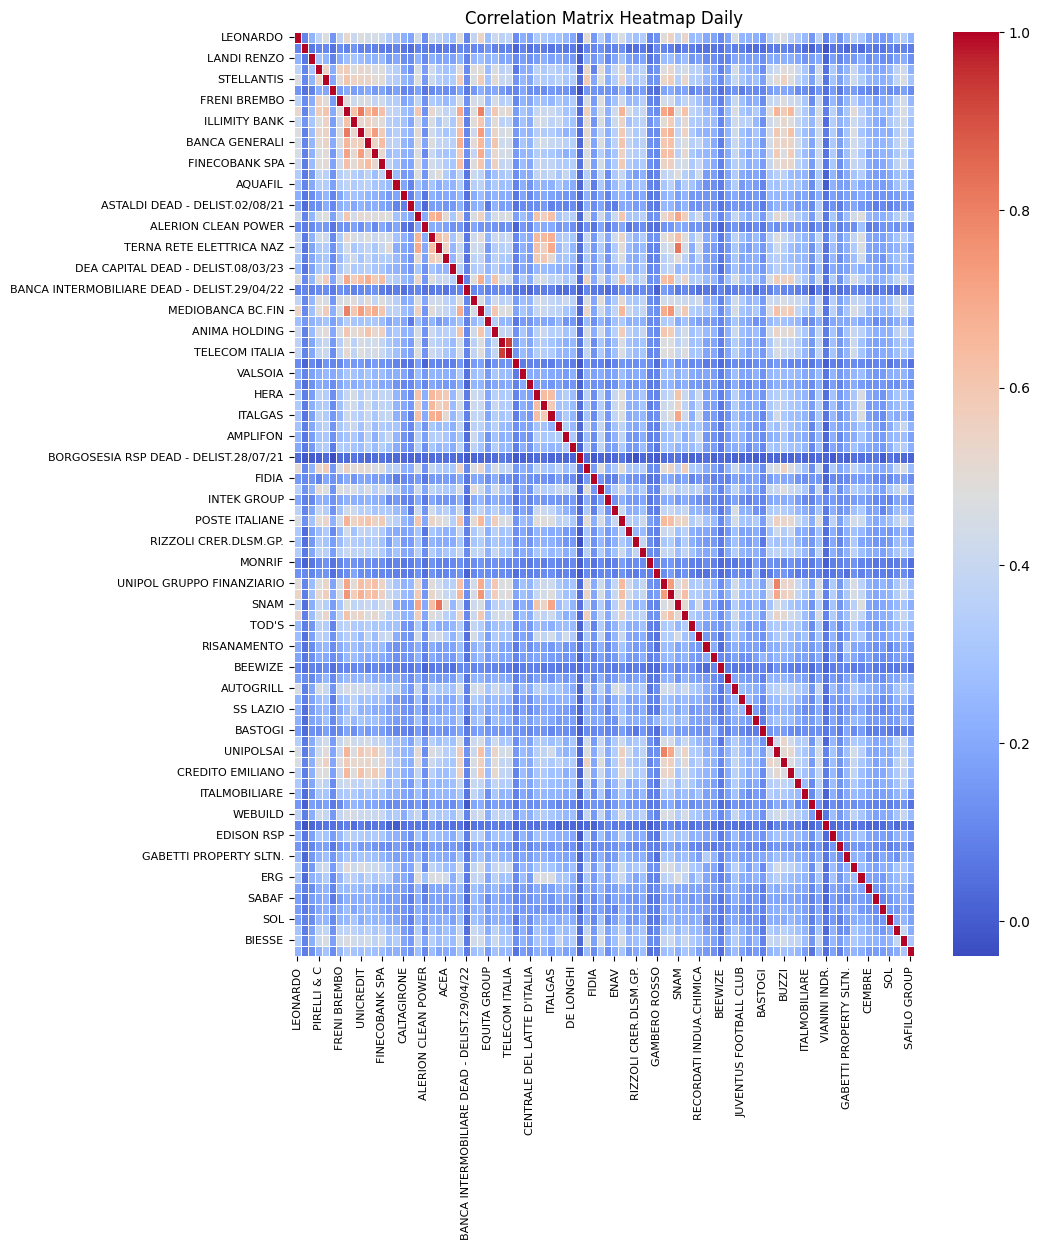

In [20]:
#create a correlation heatmap (daily)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,12))

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix_daily, cmap='coolwarm', linewidths=0.5, ax=ax)

# Set the title
ax.set_title("Correlation Matrix Heatmap Daily")

# Rotate and resize the x-axis labels
plt.xticks(rotation=90, ha='center', fontsize=8)

# Rotate and resize the y-axis labels
plt.yticks(rotation=0, ha='right', fontsize=8)

# Show the heatmap
plt.show()


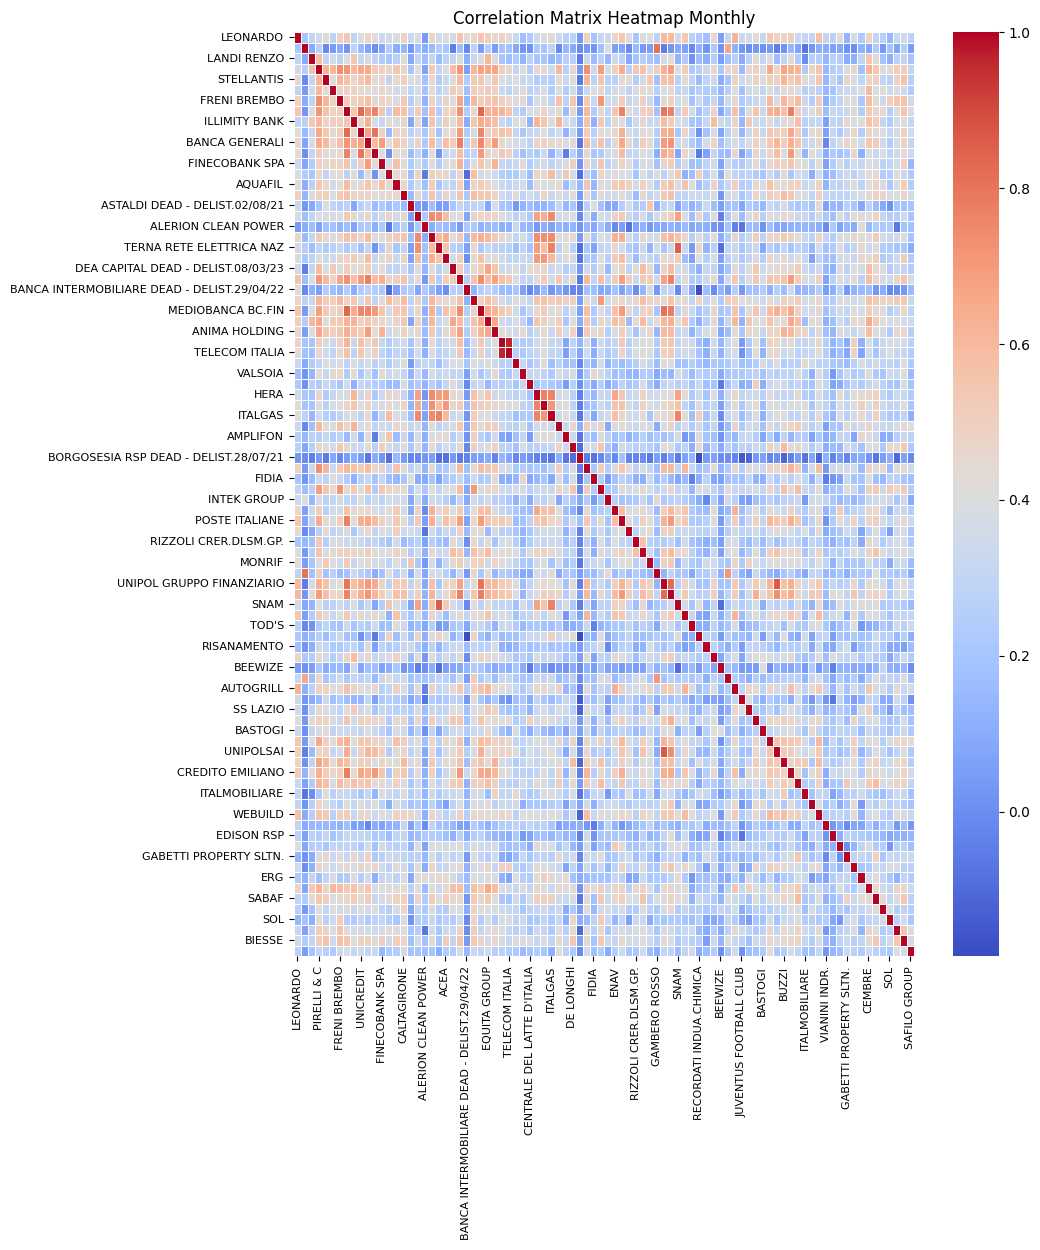

In [21]:
#create a correlation heatmap (monthly)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,12))

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix_monthly, cmap='coolwarm', linewidths=0.5, ax=ax)

# Set the title
ax.set_title("Correlation Matrix Heatmap Monthly")

# Rotate and resize the x-axis labels
plt.xticks(rotation=90, ha='center', fontsize=8)

# Rotate and resize the y-axis labels
plt.yticks(rotation=0, ha='right', fontsize=8)

# Show the heatmap
plt.show()

In [22]:
#SECOND POINT COMPLETED

In [23]:
#THIRD POINT STARTED

In [24]:
# according to the report, 14 stocks are chosen to be considered in the portfolio
nomi_selezionati = [
    "ALERION CLEAN POWER",
    "FINECOBANK SPA",
    "ASSICURAZIONI GENERALI",
    "TAMBURI INV.PARTNERS",
    "STELLANTIS",
    "AMPLIFON",
    "EXPRIVIA",
    "CEMBRE",
    "SNAM",
    "DAVIDE CAMPARI MILANO",
    "CAIRO COMMUNICATION",
    "TELECOM ITALIA RSP",
    "RATTI",
    "JUVENTUS FOOTBALL CLUB"
]

 

# select only the 14 desired stocks from the correlation matrix
correlation_matrix_selezionata_monthly = correlation_matrix_monthly.loc[nomi_selezionati, nomi_selezionati]
correlation_matrix_selezionata_monthly

,ALERION CLEAN POWER,FINECOBANK SPA,ASSICURAZIONI GENERALI,TAMBURI INV.PARTNERS,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,1.000000,0.223541,0.128784,0.217856,0.184408,0.106651,0.194153,0.154279,0.097512,-0.060384,0.122383,0.112440,0.065876,-0.072761
FINECOBANK SPA,0.223541,1.000000,0.513897,0.414270,0.452144,0.381087,0.325816,0.400385,0.250453,0.388372,0.397510,0.305919,0.372486,0.226161
ASSICURAZIONI GENERALI,0.128784,0.513897,1.000000,0.558168,0.582091,0.242755,0.276930,0.464972,0.356077,0.398719,0.592472,0.555076,0.400816,0.176290
TAMBURI INV.PARTNERS,0.217856,0.414270,0.558168,1.000000,0.509573,0.492303,0.512350,0.565684,0.424803,0.584600,0.570031,0.353619,0.402506,0.427754
STELLANTIS,0.184408,0.452144,0.582091,0.509573,1.000000,0.320736,0.199674,0.459439,0.266702,0.292477,0.373302,0.387318,0.203821,0.334889
AMPLIFON,0.106651,0.381087,0.242755,0.492303,0.320736,1.000000,0.202434,0.396607,0.369813,0.542939,0.262235,0.078132,0.313216,0.306920
EXPRIVIA,0.194153,0.325816,0.276930,0.512350,0.199674,0.202434,1.000000,0.261451,0.224909,0.413639,0.368476,0.321003,0.226924,0.173115
CEMBRE,0.154279,0.400385,0.464972,0.565684,0.459439,0.396607,0.261451,1.000000,0.356899,0.418702,0.484407,0.378925,0.390715,0.306207
SNAM,0.097512,0.250453,0.356077,0.424803,0.266702,0.369813,0.224909,0.356899,1.000000,0.537504,0.444213,0.302902,0.395936,0.237515
DAVIDE CAMPARI MILANO,-0.060384,0.388372,0.398719,0.584600,0.292477,0.542939,0.413639,0.418702,0.537504,1.000000,0.403191,0.244247,0.284062,0.257021


In [25]:
# compute the average correlation for each stock
correlation_means = correlation_matrix_selezionata_monthly.mean()

# define the two stocks with the highest average correlation
top_two_stocks = correlation_means.nlargest(2)
top_two_stocks

TAMBURI INV.PARTNERS      0.502394
ASSICURAZIONI GENERALI    0.446218
dtype: float64

In [26]:
# define the final 12 stocks
nomi_selezionati = [
    "ALERION CLEAN POWER",
    "FINECOBANK SPA",
    #"ASSICURAZIONI GENERALI",
    #"TAMBURI INV.PARTNERS",
    "STELLANTIS",
    "AMPLIFON",
    "EXPRIVIA",
    "CEMBRE",
    "SNAM",
    "DAVIDE CAMPARI MILANO",
    "CAIRO COMMUNICATION",
    "TELECOM ITALIA RSP",
    "RATTI",
    "JUVENTUS FOOTBALL CLUB"
]

 

# select only the 12 desired stocks from the correlation matrix
correlation_matrix_selezionata = correlation_matrix_monthly.loc[nomi_selezionati, nomi_selezionati]
correlation_matrix_selezionata

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,1.000000,0.223541,0.184408,0.106651,0.194153,0.154279,0.097512,-0.060384,0.122383,0.112440,0.065876,-0.072761
FINECOBANK SPA,0.223541,1.000000,0.452144,0.381087,0.325816,0.400385,0.250453,0.388372,0.397510,0.305919,0.372486,0.226161
STELLANTIS,0.184408,0.452144,1.000000,0.320736,0.199674,0.459439,0.266702,0.292477,0.373302,0.387318,0.203821,0.334889
AMPLIFON,0.106651,0.381087,0.320736,1.000000,0.202434,0.396607,0.369813,0.542939,0.262235,0.078132,0.313216,0.306920
EXPRIVIA,0.194153,0.325816,0.199674,0.202434,1.000000,0.261451,0.224909,0.413639,0.368476,0.321003,0.226924,0.173115
CEMBRE,0.154279,0.400385,0.459439,0.396607,0.261451,1.000000,0.356899,0.418702,0.484407,0.378925,0.390715,0.306207
SNAM,0.097512,0.250453,0.266702,0.369813,0.224909,0.356899,1.000000,0.537504,0.444213,0.302902,0.395936,0.237515
DAVIDE CAMPARI MILANO,-0.060384,0.388372,0.292477,0.542939,0.413639,0.418702,0.537504,1.000000,0.403191,0.244247,0.284062,0.257021
CAIRO COMMUNICATION,0.122383,0.397510,0.373302,0.262235,0.368476,0.484407,0.444213,0.403191,1.000000,0.416776,0.249650,0.147060
TELECOM ITALIA RSP,0.112440,0.305919,0.387318,0.078132,0.321003,0.378925,0.302902,0.244247,0.416776,1.000000,0.203109,0.043351


In [27]:
statistics_daily_sel = statistics_daily.iloc[:, [statistics_daily.columns.get_loc('ALERION CLEAN POWER'),
                                        statistics_daily.columns.get_loc('FINECOBANK SPA'),
                                        statistics_daily.columns.get_loc('STELLANTIS'),
                                        statistics_daily.columns.get_loc('AMPLIFON'),
                                        statistics_daily.columns.get_loc('EXPRIVIA'),
                                        statistics_daily.columns.get_loc('CEMBRE'),
                                        statistics_daily.columns.get_loc('SNAM'),
                                        statistics_daily.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                        statistics_daily.columns.get_loc('CAIRO COMMUNICATION'),
                                        statistics_daily.columns.get_loc('TELECOM ITALIA RSP'),
                                        statistics_daily.columns.get_loc('RATTI'),
                                        statistics_daily.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
statistics_daily_sel_a = statistics_daily_sel.T.mean()

In [28]:
statistics_monthly_sel = statistics_monthly.iloc[:, [statistics_monthly.columns.get_loc('ALERION CLEAN POWER'),
                                        statistics_monthly.columns.get_loc('FINECOBANK SPA'),
                                        statistics_monthly.columns.get_loc('STELLANTIS'),
                                        statistics_monthly.columns.get_loc('AMPLIFON'),
                                        statistics_monthly.columns.get_loc('EXPRIVIA'),
                                        statistics_monthly.columns.get_loc('CEMBRE'),
                                        statistics_monthly.columns.get_loc('SNAM'),
                                        statistics_monthly.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                        statistics_monthly.columns.get_loc('CAIRO COMMUNICATION'),
                                        statistics_monthly.columns.get_loc('TELECOM ITALIA RSP'),
                                        statistics_monthly.columns.get_loc('RATTI'),
                                        statistics_monthly.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
statistics_monthly_sel_a = statistics_monthly_sel.T.mean()

In [29]:
combined_statistics_a = pd.concat([statistics_daily_sel_a, statistics_monthly_sel_a], axis=1)
combined_statistics_a

,0,1
mean,0.000584,0.012606
std,0.021656,0.099328
var,0.000487,0.010945
skew,0.255564,0.431625
kurtosis,9.475686,2.823587


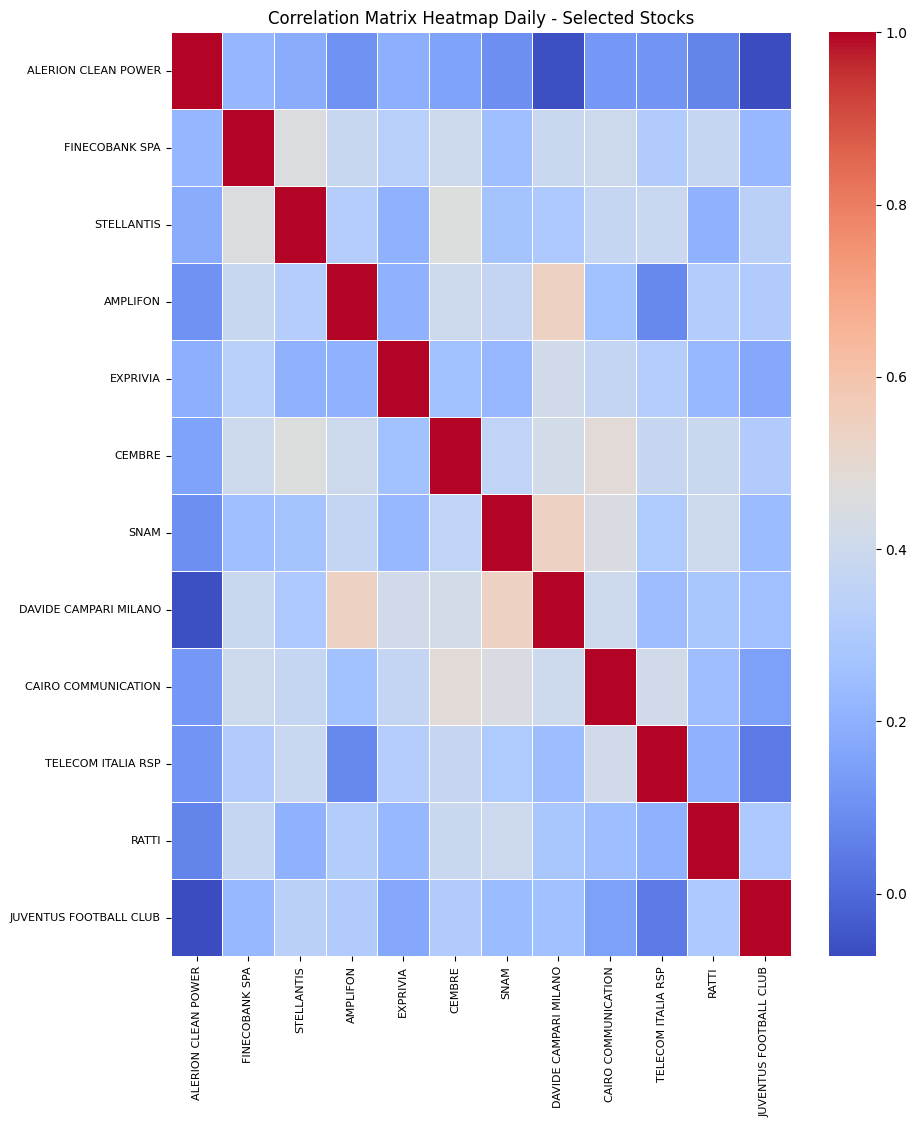

In [30]:
#create a correlation heatmap (daily)
# Create a figure and axes
fig, ax = plt.subplots(figsize=(10,12))

# Create the heatmap
heatmap = sns.heatmap(correlation_matrix_selezionata, cmap='coolwarm', linewidths=0.5, ax=ax)

# Set the title
ax.set_title("Correlation Matrix Heatmap Daily - Selected Stocks")

# Rotate and resize the x-axis labels
plt.xticks(rotation=90, ha='center', fontsize=8)

# Rotate and resize the y-axis labels
plt.yticks(rotation=0, ha='right', fontsize=8)

# Show the heatmap
plt.show()


In [31]:
#THIRD POINT COMPLETED

In [32]:
#FOURTH POINT STARTED

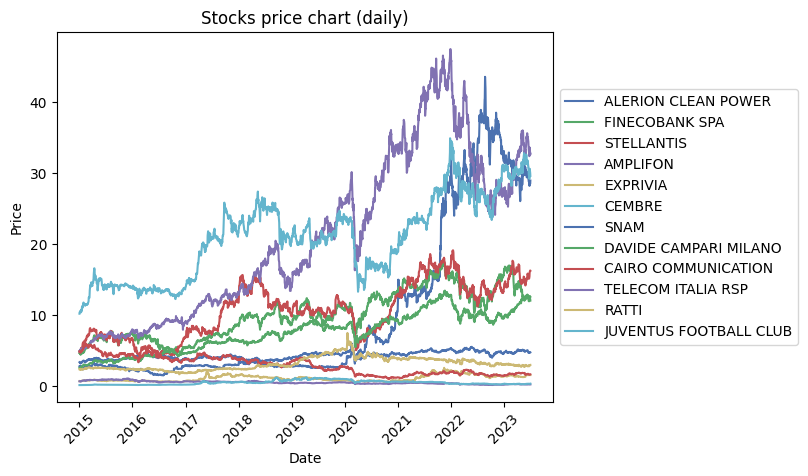

In [33]:
# Selects only columns related to the selected stocks
selected_stocks = cleaned_df_daily[nomi_selezionati]

# Transpose the DataFrame so that dates are on the x-axis and stocks are on the different curves
selected_stocks = selected_stocks.T

# Plot of the graph for each stock
for stock in selected_stocks.index:
    plt.plot(selected_stocks.columns, selected_stocks.loc[stock], label=stock)

 # Add title, axis label and legend
plt.title("Stocks price chart (daily)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()

 # Move the legend out of the graph
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Show graph
plt.show()


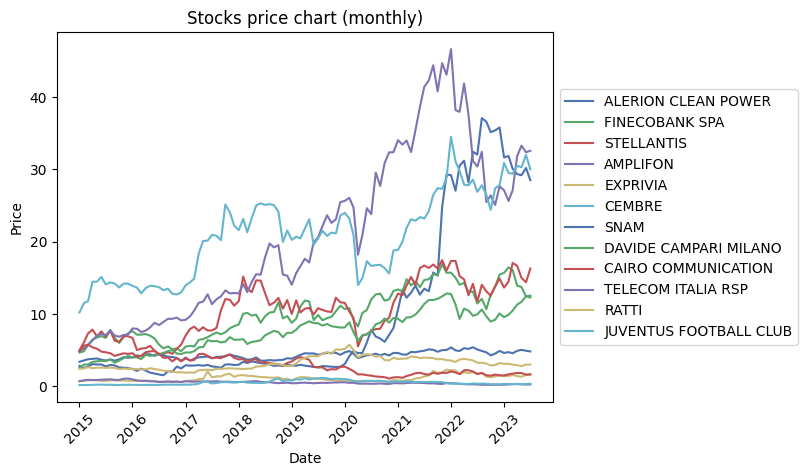

In [34]:
# Seleziona solo le colonne relative agli stock selezionati
selected_stocks = cleaned_df_monthly[nomi_selezionati]

# Trasponi il DataFrame in modo che le date siano sull'asse x e gli stock siano sulle diverse curve
selected_stocks = selected_stocks.T

# Plot del grafico per ciascun stock
for stock in selected_stocks.index:
    plt.plot(selected_stocks.columns, selected_stocks.loc[stock], label=stock)

# Aggiungi titolo, label agli assi e legenda
plt.title("Stocks price chart (monthly)")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.legend()

# Sposta la legenda fuori dal grafico
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

# Mostra il grafico
plt.show()

In [35]:
#FOURTH POINT COMPLETED

Mean Variance optimal portfolio allocation, Efficient Frontier and SML

In [36]:
#FIFTH AND SEVENTH POINT STARTED

In [37]:
#recall the variance-covariance matrix of our portfolio

nomi_selezionati = [
    "ALERION CLEAN POWER",
    "FINECOBANK SPA",
    #"ASSICURAZIONI GENERALI",
    #"TAMBURI INV.PARTNERS",
    "STELLANTIS",
    "AMPLIFON",
    "EXPRIVIA",
    "CEMBRE",
    "SNAM",
    "DAVIDE CAMPARI MILANO",
    "CAIRO COMMUNICATION",
    "TELECOM ITALIA RSP",
    "RATTI",
    "JUVENTUS FOOTBALL CLUB"
]

 

# select only the 12 desired stocks from the correlation matrix
covariance_matrix_selezionata_daily= covariance_matrix_daily.loc[nomi_selezionati, nomi_selezionati]
covariance_matrix_selezionata_daily

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,0.000643,0.000102,0.000094,0.000089,0.000079,0.000036,0.000076,0.000059,0.000066,0.000074,0.000044,0.000062
FINECOBANK SPA,0.000102,0.000419,0.000250,0.000134,0.000141,0.000076,0.000127,0.000120,0.000141,0.000190,0.000054,0.000163
STELLANTIS,0.000094,0.000250,0.000594,0.000150,0.000175,0.000106,0.000124,0.000138,0.000180,0.000235,0.000086,0.000195
AMPLIFON,0.000089,0.000134,0.000150,0.000405,0.000087,0.000079,0.000103,0.000127,0.000091,0.000107,0.000044,0.000123
EXPRIVIA,0.000079,0.000141,0.000175,0.000087,0.000882,0.000090,0.000060,0.000088,0.000126,0.000146,0.000060,0.000137
CEMBRE,0.000036,0.000076,0.000106,0.000079,0.000090,0.000319,0.000051,0.000055,0.000083,0.000086,0.000055,0.000080
SNAM,0.000076,0.000127,0.000124,0.000103,0.000060,0.000051,0.000215,0.000113,0.000083,0.000123,0.000042,0.000091
DAVIDE CAMPARI MILANO,0.000059,0.000120,0.000138,0.000127,0.000088,0.000055,0.000113,0.000255,0.000075,0.000117,0.000038,0.000087
CAIRO COMMUNICATION,0.000066,0.000141,0.000180,0.000091,0.000126,0.000083,0.000083,0.000075,0.000437,0.000150,0.000061,0.000131
TELECOM ITALIA RSP,0.000074,0.000190,0.000235,0.000107,0.000146,0.000086,0.000123,0.000117,0.000150,0.000575,0.000074,0.000161


In [38]:
#recall the variance-covariance matrix of our portfolio

nomi_selezionati = [
    "ALERION CLEAN POWER",
    "FINECOBANK SPA",
    #"ASSICURAZIONI GENERALI",
    #"TAMBURI INV.PARTNERS",
    "STELLANTIS",
    "AMPLIFON",
    "EXPRIVIA",
    "CEMBRE",
    "SNAM",
    "DAVIDE CAMPARI MILANO",
    "CAIRO COMMUNICATION",
    "TELECOM ITALIA RSP",
    "RATTI",
    "JUVENTUS FOOTBALL CLUB"
]

 

# select only the 12 desired stocks from the correlation matrix
covariance_matrix_selezionata_monthly = covariance_matrix_monthly.loc[nomi_selezionati, nomi_selezionati]
covariance_matrix_selezionata_monthly

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,0.016022,0.002471,0.002801,0.001147,0.003963,0.001587,0.000640,-0.000522,0.001521,0.001459,0.000502,-0.001377
FINECOBANK SPA,0.002471,0.007625,0.004737,0.002827,0.004588,0.002842,0.001135,0.002317,0.003408,0.002738,0.001958,0.002952
STELLANTIS,0.002801,0.004737,0.014394,0.003269,0.003863,0.004480,0.001660,0.002397,0.004398,0.004763,0.001472,0.006006
AMPLIFON,0.001147,0.002827,0.003269,0.007218,0.002773,0.002739,0.001630,0.003152,0.002188,0.000680,0.001602,0.003898
EXPRIVIA,0.003963,0.004588,0.003863,0.002773,0.026003,0.003427,0.001882,0.004557,0.005834,0.005306,0.002203,0.004173
CEMBRE,0.001587,0.002842,0.004480,0.002739,0.003427,0.006606,0.001505,0.002325,0.003866,0.003157,0.001912,0.003720
SNAM,0.000640,0.001135,0.001660,0.001630,0.001882,0.001505,0.002692,0.001905,0.002263,0.001611,0.001237,0.001842
DAVIDE CAMPARI MILANO,-0.000522,0.002317,0.002397,0.003152,0.004557,0.002325,0.001905,0.004668,0.002705,0.001711,0.001168,0.002625
CAIRO COMMUNICATION,0.001521,0.003408,0.004398,0.002188,0.005834,0.003866,0.002263,0.002705,0.009642,0.004195,0.001476,0.002158
TELECOM ITALIA RSP,0.001459,0.002738,0.004763,0.000680,0.005306,0.003157,0.001611,0.001711,0.004195,0.010507,0.001253,0.000664


In [39]:
# Seleziona solo le colonne relative agli stock selezionati
selected_stocks = solution_daily[nomi_selezionati]
selected_stocks = selected_stocks.iloc[1:,:]
vector_means=selected_stocks.mean()
vector_means_transposed = vector_means.T
vector_means_transposed
returns_daily = vector_means_transposed.to_numpy()  # Convert Series to numpy array
returns_daily

array([ 0.00136426,  0.00063798,  0.00083343,  0.00106012,  0.00078338,
        0.00063941,  0.0002639 ,  0.0008417 , -0.00026319, -0.0001627 ,
        0.00030152,  0.00070779])

In [40]:
# Seleziona solo le colonne relative agli stock selezionati
selected_stocks = solution_monthly[nomi_selezionati]
selected_stocks = selected_stocks.iloc[1:,:]
vector_means=selected_stocks.mean()
vector_means_transposed = vector_means.T
vector_means_transposed
returns_monthly = vector_means_transposed.to_numpy()  # Convert Series to numpy array
returns_monthly

array([ 0.02978817,  0.01330502,  0.01900335,  0.02241812,  0.01881972,
        0.01393285,  0.00480906,  0.01794153, -0.00569407, -0.00479865,
        0.00397481,  0.01776662])

In [41]:
# Mean-Variance optimal portfolio allocation (daily)
# Expected returns
returns= returns_daily

covariance = covariance_matrix_selezionata_daily

# Number of assets
n_assets = len(returns)

# Define the portfolio weights as variables
weights = cp.Variable(n_assets)

# Define the expected return and portfolio variance
expected_return = returns @ weights
portfolio_variance = cp.quad_form(weights, covariance)

# Define the objective function to maximize the Sharpe ratio
risk_aversion = 7  # Modify this value to adjust risk aversion
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,   # Weights sum up to 1
    ]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Print the optimal weights
print("Optimal Weights:")
for i in range(n_assets):
    print(f"Asset {i+1}: {optimal_weights[i]}")

# Calculate the optimal portfolio expected return and volatility
optimal_return = expected_return.value *100
optimal_volatility = np.sqrt(portfolio_variance.value)*100
optimal_variance = optimal_volatility **2

#computation of skewness and kurtosis
cleaned_df_daily_sel = data_daily.iloc[2:, [data_daily.columns.get_loc('price_date'),
                                            data_daily.columns.get_loc('ALERION CLEAN POWER'),
                                            data_daily.columns.get_loc('FINECOBANK SPA'),
                                            data_daily.columns.get_loc('STELLANTIS'),
                                            data_daily.columns.get_loc('AMPLIFON'),
                                            data_daily.columns.get_loc('EXPRIVIA'),
                                            data_daily.columns.get_loc('CEMBRE'),
                                            data_daily.columns.get_loc('SNAM'),
                                            data_daily.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                            data_daily.columns.get_loc('CAIRO COMMUNICATION'),
                                            data_daily.columns.get_loc('TELECOM ITALIA RSP'),
                                            data_daily.columns.get_loc('RATTI'),
                                            data_daily.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_daily_sel.set_index("price_date", inplace = True)
cleaned_df_daily_sel
returns_sel_d = cleaned_df_daily_sel.pct_change(periods=1)
portfolio_return = returns_sel_d @ optimal_weights
optimal_skewness = sc.skew(portfolio_return[1:])
optimal_kurtosis = sc.kurtosis(portfolio_return[1:])

# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {optimal_return:.4f}")
print(f"Volatility: {optimal_volatility:.4f}")
print(f"Variance: {optimal_variance:.4f}")
print(f"Skewness: {optimal_skewness:.4f}")
print(f"Kurtosis: {optimal_kurtosis:.4f}")

Optimal Weights:
Asset 1: 0.17977698302990813
Asset 2: 0.04307054262222142
Asset 3: 0.027436846821572842
Asset 4: 0.1442957028560317
Asset 5: 0.05377376212059281
Asset 6: 0.21840231804912977
Asset 7: 0.04782586748279725
Asset 8: 0.29858044663776473
Asset 9: -0.08764832518585165
Asset 10: -0.10586955072521789
Asset 11: 0.12250462617878287
Asset 12: 0.05785078011226801
Optimal Portfolio:
Expected Return: 0.1012
Volatility: 1.1795
Variance: 1.3913
Skewness: -0.6194
Kurtosis: 9.6695


In [42]:
# Mean-Variance optimal portfolio allocation (monthly)
# Expected returns
returns= returns_monthly

covariance = covariance_matrix_selezionata_monthly

# Number of assets
n_assets = len(returns)

# Define the portfolio weights as variables
weights = cp.Variable(n_assets)

# Define the expected return and portfolio variance
expected_return = returns @ weights
portfolio_variance = cp.quad_form(weights, covariance)

# Define the objective function to maximize the Sharpe ratio
risk_aversion = 7  # Modify this value to adjust risk aversion
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,   # Weights sum up to 1
    ]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Print the optimal weights
print("Optimal Weights:")
for i in range(n_assets):
    print(f"Asset {i+1}: {optimal_weights[i]}")

# Calculate the optimal portfolio expected return and volatility
optimal_return = expected_return.value*100
optimal_volatility = np.sqrt(portfolio_variance.value)*100
optimal_variance = optimal_volatility **2

#computation of skewness and kurtosis
cleaned_df_monthly_sel = data_monthly.iloc[2:, [data_monthly.columns.get_loc('price_date'),
                                                data_monthly.columns.get_loc('ALERION CLEAN POWER'),
                                                data_monthly.columns.get_loc('FINECOBANK SPA'),
                                                data_monthly.columns.get_loc('STELLANTIS'),
                                                data_monthly.columns.get_loc('AMPLIFON'),
                                                data_monthly.columns.get_loc('EXPRIVIA'),
                                                data_monthly.columns.get_loc('CEMBRE'),
                                                data_monthly.columns.get_loc('SNAM'),
                                                data_monthly.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                                data_monthly.columns.get_loc('CAIRO COMMUNICATION'),
                                                data_monthly.columns.get_loc('TELECOM ITALIA RSP'),
                                                data_monthly.columns.get_loc('RATTI'),
                                                data_monthly.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_monthly_sel.set_index("price_date", inplace = True)
cleaned_df_monthly_sel
returns_sel_m = cleaned_df_monthly_sel.pct_change(periods=1)
portfolio_return = returns_sel_m @ optimal_weights
optimal_skewness = sc.skew(portfolio_return[1:])
optimal_kurtosis = sc.kurtosis(portfolio_return[1:])

# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {optimal_return:.4f}")
print(f"Volatility: {optimal_volatility:.4f}")
print(f"Variance: {optimal_variance:.4f}")
print(f"Skewness: {optimal_skewness:.4f}")
print(f"Kurtosis: {optimal_kurtosis:.4f}")

Optimal Weights:
Asset 1: 0.21081541972268103
Asset 2: 0.032579841190466405
Asset 3: 0.03760981808022628
Asset 4: 0.08031271835850334
Asset 5: -0.0201017489512481
Asset 6: 0.10821080432082489
Asset 7: 0.20059567776279066
Asset 8: 0.4378526289976743
Asset 9: -0.208546383403756
Asset 10: -0.038055261449119734
Asset 11: 0.14150464642387967
Asset 12: 0.01722183894707716
Optimal Portfolio:
Expected Return: 2.1417
Volatility: 5.2194
Variance: 27.2424
Skewness: -0.2291
Kurtosis: 1.1482


In [43]:
#FIFTH AND SEVENTH POINT COMPLETED

In [44]:
#SIXTH AND SEVENTH POINT STARTED

In [45]:
# Mean-Variance optimal portfolio allocation (daily) -> non-negativity constraint 
# Expected returns
returns= returns_daily

covariance = covariance_matrix_selezionata_daily

# Number of assets
n_assets = len(returns)

# Define the portfolio weights as variables
weights = cp.Variable(n_assets)

# Define the expected return and portfolio variance
expected_return = returns @ weights
portfolio_variance = cp.quad_form(weights, covariance)

# Define the objective function to maximize the Sharpe ratio
risk_aversion = 5  # Modify this value to adjust risk aversion
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,   # Weights sum up to 1
    weights >= 0            # Weights are non-negative
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Print the optimal weights
print("Optimal Weights:")
for i in range(n_assets):
    print(f"Asset {i+1}: {optimal_weights[i]}")

# Calculate the optimal portfolio expected return and volatility
optimal_return = expected_return.value*100
optimal_volatility = np.sqrt(portfolio_variance.value)*100
optimal_variance = optimal_volatility **2

#computation of skewness and kurtosis
cleaned_df_daily_sel = data_daily.iloc[2:, [data_daily.columns.get_loc('price_date'),
                                            data_daily.columns.get_loc('ALERION CLEAN POWER'),
                                            data_daily.columns.get_loc('FINECOBANK SPA'),
                                            data_daily.columns.get_loc('STELLANTIS'),
                                            data_daily.columns.get_loc('AMPLIFON'),
                                            data_daily.columns.get_loc('EXPRIVIA'),
                                            data_daily.columns.get_loc('CEMBRE'),
                                            data_daily.columns.get_loc('SNAM'),
                                            data_daily.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                            data_daily.columns.get_loc('CAIRO COMMUNICATION'),
                                            data_daily.columns.get_loc('TELECOM ITALIA RSP'),
                                            data_daily.columns.get_loc('RATTI'),
                                            data_daily.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_daily_sel.set_index("price_date", inplace = True)
cleaned_df_daily_sel
returns_sel_d = cleaned_df_daily_sel.pct_change(periods=1)
portfolio_return = returns_sel_d @ optimal_weights
optimal_skewness = sc.skew(portfolio_return[1:])
optimal_kurtosis = sc.kurtosis(portfolio_return[1:])

# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {optimal_return:.4f}")
print(f"Volatility: {optimal_volatility:.4f}")
print(f"Variance: {optimal_variance:.4f}")
print(f"Skewness: {optimal_skewness:.4f}")
print(f"Kurtosis: {optimal_kurtosis:.4f}")

Optimal Weights:
Asset 1: 0.20418724838191032
Asset 2: 2.8621749233794713e-23
Asset 3: 0.0014679646318840436
Asset 4: 0.1652052848714745
Asset 5: 0.04323272400697947
Asset 6: 0.18453913903039737
Asset 7: 6.498288342670206e-25
Asset 8: 0.286864273349584
Asset 9: 1.4808200835876739e-22
Asset 10: 3.540206858917897e-23
Asset 11: 0.07296489707714143
Asset 12: 0.04153846865062903
Optimal Portfolio:
Expected Return: 0.0900
Volatility: 1.1512
Variance: 1.3253
Skewness: -0.8218
Kurtosis: 12.0543


In [46]:
# Mean-Variance optimal portfolio allocation (monthly) -> non-negativity constraint
# Expected returns
returns= returns_monthly

covariance = covariance_matrix_selezionata_monthly

# Number of assets
n_assets = len(returns)

# Define the portfolio weights as variables
weights = cp.Variable(n_assets)

# Define the expected return and portfolio variance
expected_return = returns @ weights
portfolio_variance = cp.quad_form(weights, covariance)

# Define the objective function to maximize the Sharpe ratio
risk_aversion = 5  # Modify this value to adjust risk aversion
objective = cp.Maximize(expected_return - risk_aversion * portfolio_variance)

# Define the constraints
constraints = [
    cp.sum(weights) == 1,   # Weights sum up to 1
    weights >= 0            # Weights are non-negative
]

# Define the problem
problem = cp.Problem(objective, constraints)

# Solve the problem
problem.solve()

# Get the optimal weights
optimal_weights = weights.value

# Print the optimal weights
print("Optimal Weights:")
for i in range(n_assets):
    print(f"Asset {i+1}: {optimal_weights[i]}")

# Calculate the optimal portfolio expected return and volatility
optimal_return = expected_return.value*100
optimal_volatility = np.sqrt(portfolio_variance.value)*100
optimal_variance = optimal_volatility **2

#computation of skewness and kurtosis
cleaned_df_monthly_sel = data_monthly.iloc[2:, [data_monthly.columns.get_loc('price_date'),
                                                data_monthly.columns.get_loc('ALERION CLEAN POWER'),
                                                data_monthly.columns.get_loc('FINECOBANK SPA'),
                                                data_monthly.columns.get_loc('STELLANTIS'),
                                                data_monthly.columns.get_loc('AMPLIFON'),
                                                data_monthly.columns.get_loc('EXPRIVIA'),
                                                data_monthly.columns.get_loc('CEMBRE'),
                                                data_monthly.columns.get_loc('SNAM'),
                                                data_monthly.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                                data_monthly.columns.get_loc('CAIRO COMMUNICATION'),
                                                data_monthly.columns.get_loc('TELECOM ITALIA RSP'),
                                                data_monthly.columns.get_loc('RATTI'),
                                                data_monthly.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_monthly_sel.set_index("price_date", inplace = True)
cleaned_df_monthly_sel
returns_sel_m = cleaned_df_monthly_sel.pct_change(periods=1)
portfolio_return = returns_sel_m @ optimal_weights
optimal_skewness = sc.skew(portfolio_return[1:])
optimal_kurtosis = sc.kurtosis(portfolio_return[1:])


# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {optimal_return:.4f}")
print(f"Volatility: {optimal_volatility:.4f}")
print(f"Variance: {optimal_variance:.4f}")
print(f"Skewness: {optimal_skewness:.4f}")
print(f"Kurtosis: {optimal_kurtosis:.4f}")

Optimal Weights:
Asset 1: 0.2464979415139017
Asset 2: 1.0288878725281259e-24
Asset 3: 0.007383720951672781
Asset 4: 0.15284005606668286
Asset 5: 2.71717569012347e-23
Asset 6: 0.01995022019669429
Asset 7: 4.8945530508768645e-25
Asset 8: 0.4535208605371068
Asset 9: -1.7133702403234026e-23
Asset 10: -8.040963430499724e-23
Asset 11: 0.07728595700460221
Asset 12: 0.0425212437293395
Optimal Portfolio:
Expected Return: 2.0387
Volatility: 5.4593
Variance: 29.8044
Skewness: -0.2672
Kurtosis: 0.8799


In [47]:
#SIXTH AND SEVENTH POINT COMPLETED

In [48]:
#EIGHTH POINT STARTED

In [49]:
#(daily)
cleaned_df_daily = data_daily.iloc[2:, [data_daily.columns.get_loc('price_date'),
                                        data_daily.columns.get_loc('ALERION CLEAN POWER'),
                                        data_daily.columns.get_loc('FINECOBANK SPA'),
                                        data_daily.columns.get_loc('STELLANTIS'),
                                        data_daily.columns.get_loc('AMPLIFON'),
                                        data_daily.columns.get_loc('EXPRIVIA'),
                                        data_daily.columns.get_loc('CEMBRE'),
                                        data_daily.columns.get_loc('SNAM'),
                                        data_daily.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                        data_daily.columns.get_loc('CAIRO COMMUNICATION'),
                                        data_daily.columns.get_loc('TELECOM ITALIA RSP'),
                                        data_daily.columns.get_loc('RATTI'),
                                        data_daily.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_daily.set_index("price_date", inplace = True)
solution_daily = cleaned_df_daily.pct_change(periods=1)
solution_daily


,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.005682,0.015424,0.007800,-0.000816,-0.016095,0.018609,-0.005880,-0.022287,0.020190,0.004326,0.000000,0.013547
2015-01-05,-0.000706,-0.018565,-0.021703,0.025510,-0.007112,0.002885,-0.033351,-0.022795,-0.029079,-0.024408,-0.033333,-0.003038
2015-01-06,-0.010601,-0.011178,0.015863,0.000000,0.005731,0.015340,-0.004582,0.023327,-0.018303,0.005151,0.025862,-0.005484
2015-01-07,0.009286,-0.018261,0.008831,0.026866,-0.008547,-0.015109,0.000525,0.009911,-0.002119,-0.002928,-0.005882,-0.014706
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,-0.007042,0.007871,0.010187,0.006177,0.001271,0.006849,0.004871,0.023370,0.012270,0.032881,0.000000,0.013973
2023-06-29,0.007092,0.000000,0.035553,0.020565,0.002538,0.006803,0.005479,0.002003,0.008485,-0.009948,0.031802,0.018574
2023-06-30,0.007042,0.012330,0.004370,0.010226,-0.003797,0.033784,0.003354,0.014794,-0.007212,0.003215,0.020548,0.008824


In [50]:
covariance_matrix_selezionata_daily

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,0.000643,0.000102,0.000094,0.000089,0.000079,0.000036,0.000076,0.000059,0.000066,0.000074,0.000044,0.000062
FINECOBANK SPA,0.000102,0.000419,0.000250,0.000134,0.000141,0.000076,0.000127,0.000120,0.000141,0.000190,0.000054,0.000163
STELLANTIS,0.000094,0.000250,0.000594,0.000150,0.000175,0.000106,0.000124,0.000138,0.000180,0.000235,0.000086,0.000195
AMPLIFON,0.000089,0.000134,0.000150,0.000405,0.000087,0.000079,0.000103,0.000127,0.000091,0.000107,0.000044,0.000123
EXPRIVIA,0.000079,0.000141,0.000175,0.000087,0.000882,0.000090,0.000060,0.000088,0.000126,0.000146,0.000060,0.000137
CEMBRE,0.000036,0.000076,0.000106,0.000079,0.000090,0.000319,0.000051,0.000055,0.000083,0.000086,0.000055,0.000080
SNAM,0.000076,0.000127,0.000124,0.000103,0.000060,0.000051,0.000215,0.000113,0.000083,0.000123,0.000042,0.000091
DAVIDE CAMPARI MILANO,0.000059,0.000120,0.000138,0.000127,0.000088,0.000055,0.000113,0.000255,0.000075,0.000117,0.000038,0.000087
CAIRO COMMUNICATION,0.000066,0.000141,0.000180,0.000091,0.000126,0.000083,0.000083,0.000075,0.000437,0.000150,0.000061,0.000131
TELECOM ITALIA RSP,0.000074,0.000190,0.000235,0.000107,0.000146,0.000086,0.000123,0.000117,0.000150,0.000575,0.000074,0.000161


In [51]:
#not required, it's just for defining it
correlation_matrix_selezionata_daily = correlation_matrix_daily.loc[nomi_selezionati, nomi_selezionati]
correlation_matrix_selezionata_daily

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,1.000000,0.197460,0.152549,0.174960,0.105438,0.080070,0.203191,0.146477,0.123699,0.121964,0.085631,0.092375
FINECOBANK SPA,0.197460,1.000000,0.502129,0.324057,0.231621,0.208716,0.422558,0.367736,0.329598,0.387882,0.130621,0.303343
STELLANTIS,0.152549,0.502129,1.000000,0.305775,0.242300,0.242995,0.346063,0.354472,0.354424,0.402746,0.174615,0.303498
AMPLIFON,0.174960,0.324057,0.305775,1.000000,0.145454,0.220333,0.347617,0.394913,0.215487,0.221234,0.109388,0.232821
EXPRIVIA,0.105438,0.231621,0.242300,0.145454,1.000000,0.168896,0.137420,0.185870,0.203205,0.204378,0.100760,0.175562
CEMBRE,0.080070,0.208716,0.242995,0.220333,0.168896,1.000000,0.194209,0.192014,0.222330,0.200564,0.152108,0.169674
SNAM,0.203191,0.422558,0.346063,0.347617,0.137420,0.194209,1.000000,0.482871,0.271822,0.349215,0.140747,0.234504
DAVIDE CAMPARI MILANO,0.146477,0.367736,0.354472,0.394913,0.185870,0.192014,0.482871,1.000000,0.224377,0.305356,0.117160,0.207879
CAIRO COMMUNICATION,0.123699,0.329598,0.354424,0.215487,0.203205,0.222330,0.271822,0.224377,1.000000,0.299852,0.144421,0.238719
TELECOM ITALIA RSP,0.121964,0.387882,0.402746,0.221234,0.204378,0.200564,0.349215,0.305356,0.299852,1.000000,0.154044,0.255458


In [52]:
mu=(returns_sel_d*100).mean()
S=(returns_sel_d*100).cov()

In [53]:
# Yearly returns for individual companies
individual_expected_return = mu
individual_expected_return


ALERION CLEAN POWER       0.136426
FINECOBANK SPA            0.063798
STELLANTIS                0.083343
AMPLIFON                  0.106012
EXPRIVIA                  0.078338
CEMBRE                    0.063941
SNAM                      0.026390
DAVIDE CAMPARI MILANO     0.084170
CAIRO COMMUNICATION      -0.026319
TELECOM ITALIA RSP       -0.016270
RATTI                     0.030152
JUVENTUS FOOTBALL CLUB    0.070779
dtype: float64

In [54]:
# Volatility
individual_sd = (returns_sel_d*100).std()
individual_sd

ALERION CLEAN POWER       2.535002
FINECOBANK SPA            2.047249
STELLANTIS                2.436674
AMPLIFON                  2.013177
EXPRIVIA                  2.970048
CEMBRE                    1.787161
SNAM                      1.466430
DAVIDE CAMPARI MILANO     1.596858
CAIRO COMMUNICATION       2.089487
TELECOM ITALIA RSP        2.397783
RATTI                     2.015187
JUVENTUS FOOTBALL CLUB    2.632614
dtype: float64

In [55]:
assets = pd.concat([individual_expected_return, individual_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ALERION CLEAN POWER,0.136426,2.535002
FINECOBANK SPA,0.063798,2.047249
STELLANTIS,0.083343,2.436674
AMPLIFON,0.106012,2.013177
EXPRIVIA,0.078338,2.970048
CEMBRE,0.063941,1.787161
SNAM,0.026390,1.466430
DAVIDE CAMPARI MILANO,0.084170,1.596858
CAIRO COMMUNICATION,-0.026319,2.089487
TELECOM ITALIA RSP,-0.016270,2.397783


In [56]:
#now we define the portfolio for which the sharpe ratio is maximized
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 9.8%
Annual volatility: 123.8%
Sharpe Ratio: 0.06


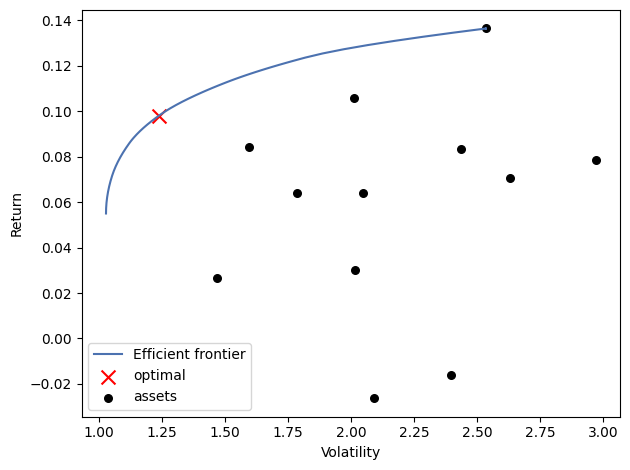

In [57]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [58]:
#end of daily part

In [59]:
#(monthly)
cleaned_df_monthly = data_monthly.iloc[2:, [data_monthly.columns.get_loc('price_date'),
                                        data_monthly.columns.get_loc('ALERION CLEAN POWER'),
                                        data_monthly.columns.get_loc('FINECOBANK SPA'),
                                        data_monthly.columns.get_loc('STELLANTIS'),
                                        data_monthly.columns.get_loc('AMPLIFON'),
                                        data_monthly.columns.get_loc('EXPRIVIA'),
                                        data_monthly.columns.get_loc('CEMBRE'),
                                        data_monthly.columns.get_loc('SNAM'),
                                        data_monthly.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                        data_monthly.columns.get_loc('CAIRO COMMUNICATION'),
                                        data_monthly.columns.get_loc('TELECOM ITALIA RSP'),
                                        data_monthly.columns.get_loc('RATTI'),
                                        data_monthly.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_monthly.set_index("price_date", inplace = True)
solution_monthly = cleaned_df_monthly.pct_change(periods=1)
solution_monthly

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,-0.097301,0.035990,0.222921,0.057300,0.120364,0.127326,0.056086,0.165698,0.157808,0.175919,0.025000,0.054187
2015-03-01,0.080252,0.180728,0.201009,0.104147,0.024360,0.022589,0.044797,0.005819,0.021352,0.081545,0.076423,0.028037
2015-04-01,0.110706,0.132224,0.072351,0.108297,0.043293,0.228547,0.016792,0.114050,-0.060105,-0.015306,-0.055891,0.094318
2015-05-01,-0.010492,0.042537,-0.117069,0.098503,-0.037989,0.000000,0.012195,0.025223,-0.037071,-0.009787,0.028000,0.165628
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,-0.054945,-0.020979,0.177250,0.057332,0.096503,-0.003390,-0.031376,0.057128,0.059394,0.177647,-0.035370,0.001987
2023-04-01,-0.024917,-0.135714,-0.022631,0.174105,-0.107143,0.037415,0.073101,0.080344,0.052632,0.003663,-0.023333,0.120291
2023-05-01,-0.005111,-0.013295,-0.100180,0.045555,-0.057143,-0.006557,0.027942,0.034086,-0.008696,-0.130723,-0.051195,-0.146313


In [60]:
covariance_matrix_selezionata_monthly

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,0.016022,0.002471,0.002801,0.001147,0.003963,0.001587,0.000640,-0.000522,0.001521,0.001459,0.000502,-0.001377
FINECOBANK SPA,0.002471,0.007625,0.004737,0.002827,0.004588,0.002842,0.001135,0.002317,0.003408,0.002738,0.001958,0.002952
STELLANTIS,0.002801,0.004737,0.014394,0.003269,0.003863,0.004480,0.001660,0.002397,0.004398,0.004763,0.001472,0.006006
AMPLIFON,0.001147,0.002827,0.003269,0.007218,0.002773,0.002739,0.001630,0.003152,0.002188,0.000680,0.001602,0.003898
EXPRIVIA,0.003963,0.004588,0.003863,0.002773,0.026003,0.003427,0.001882,0.004557,0.005834,0.005306,0.002203,0.004173
CEMBRE,0.001587,0.002842,0.004480,0.002739,0.003427,0.006606,0.001505,0.002325,0.003866,0.003157,0.001912,0.003720
SNAM,0.000640,0.001135,0.001660,0.001630,0.001882,0.001505,0.002692,0.001905,0.002263,0.001611,0.001237,0.001842
DAVIDE CAMPARI MILANO,-0.000522,0.002317,0.002397,0.003152,0.004557,0.002325,0.001905,0.004668,0.002705,0.001711,0.001168,0.002625
CAIRO COMMUNICATION,0.001521,0.003408,0.004398,0.002188,0.005834,0.003866,0.002263,0.002705,0.009642,0.004195,0.001476,0.002158
TELECOM ITALIA RSP,0.001459,0.002738,0.004763,0.000680,0.005306,0.003157,0.001611,0.001711,0.004195,0.010507,0.001253,0.000664


In [61]:
#not required, it's just for defining it
correlation_matrix_selezionata_monthly

,ALERION CLEAN POWER,FINECOBANK SPA,ASSICURAZIONI GENERALI,TAMBURI INV.PARTNERS,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
ALERION CLEAN POWER,1.000000,0.223541,0.128784,0.217856,0.184408,0.106651,0.194153,0.154279,0.097512,-0.060384,0.122383,0.112440,0.065876,-0.072761
FINECOBANK SPA,0.223541,1.000000,0.513897,0.414270,0.452144,0.381087,0.325816,0.400385,0.250453,0.388372,0.397510,0.305919,0.372486,0.226161
ASSICURAZIONI GENERALI,0.128784,0.513897,1.000000,0.558168,0.582091,0.242755,0.276930,0.464972,0.356077,0.398719,0.592472,0.555076,0.400816,0.176290
TAMBURI INV.PARTNERS,0.217856,0.414270,0.558168,1.000000,0.509573,0.492303,0.512350,0.565684,0.424803,0.584600,0.570031,0.353619,0.402506,0.427754
STELLANTIS,0.184408,0.452144,0.582091,0.509573,1.000000,0.320736,0.199674,0.459439,0.266702,0.292477,0.373302,0.387318,0.203821,0.334889
AMPLIFON,0.106651,0.381087,0.242755,0.492303,0.320736,1.000000,0.202434,0.396607,0.369813,0.542939,0.262235,0.078132,0.313216,0.306920
EXPRIVIA,0.194153,0.325816,0.276930,0.512350,0.199674,0.202434,1.000000,0.261451,0.224909,0.413639,0.368476,0.321003,0.226924,0.173115
CEMBRE,0.154279,0.400385,0.464972,0.565684,0.459439,0.396607,0.261451,1.000000,0.356899,0.418702,0.484407,0.378925,0.390715,0.306207
SNAM,0.097512,0.250453,0.356077,0.424803,0.266702,0.369813,0.224909,0.356899,1.000000,0.537504,0.444213,0.302902,0.395936,0.237515
DAVIDE CAMPARI MILANO,-0.060384,0.388372,0.398719,0.584600,0.292477,0.542939,0.413639,0.418702,0.537504,1.000000,0.403191,0.244247,0.284062,0.257021


In [62]:
mu=(returns_sel_m*100).mean()
S=(returns_sel_m*100).cov()

In [63]:
# Volatility
individual_sd = (returns_sel_m*100).std()
individual_sd

ALERION CLEAN POWER       12.657981
FINECOBANK SPA             8.732252
STELLANTIS                11.997645
AMPLIFON                   8.496024
EXPRIVIA                  16.125422
CEMBRE                     8.127573
SNAM                       5.188157
DAVIDE CAMPARI MILANO      6.832159
CAIRO COMMUNICATION        9.819158
TELECOM ITALIA RSP        10.250530
RATTI                      6.019705
JUVENTUS FOOTBALL CLUB    14.947052
dtype: float64

In [64]:
# Yearly returns for individual companies
individual_expected_return = mu
individual_expected_return

ALERION CLEAN POWER       2.978817
FINECOBANK SPA            1.330502
STELLANTIS                1.900335
AMPLIFON                  2.241812
EXPRIVIA                  1.881972
CEMBRE                    1.393285
SNAM                      0.480906
DAVIDE CAMPARI MILANO     1.794153
CAIRO COMMUNICATION      -0.569407
TELECOM ITALIA RSP       -0.479865
RATTI                     0.397481
JUVENTUS FOOTBALL CLUB    1.776662
dtype: float64

In [65]:
assets = pd.concat([individual_expected_return, individual_sd], axis=1) # Creating a table for visualising returns and volatility of assets
assets.columns = ['Returns', 'Volatility']
assets

,Returns,Volatility
ALERION CLEAN POWER,2.978817,12.657981
FINECOBANK SPA,1.330502,8.732252
STELLANTIS,1.900335,11.997645
AMPLIFON,2.241812,8.496024
EXPRIVIA,1.881972,16.125422
CEMBRE,1.393285,8.127573
SNAM,0.480906,5.188157
DAVIDE CAMPARI MILANO,1.794153,6.832159
CAIRO COMMUNICATION,-0.569407,9.819158
TELECOM ITALIA RSP,-0.479865,10.250530


In [66]:
#now we define the portfolio for which the sharpe ratio is maximized
cla = CLA(mu, S)
cla.max_sharpe()
cla.portfolio_performance(verbose=True);

Expected annual return: 222.7%
Annual volatility: 584.3%
Sharpe Ratio: 0.38


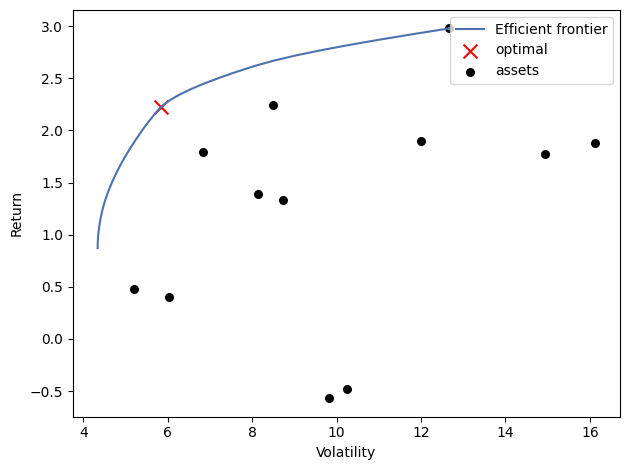

In [67]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [68]:
#EIGHTH POINT COMPLETED

In [69]:
#NINTH POINT STARTED

In [70]:
funds_daily = pd.read_excel("addendum_data.xlsx", sheet_name="Daily")
funds_daily.rename(columns={funds_daily.columns[0]: "price_date"}, inplace=True)
#funds_daily.set_index("price_date", inplace = True)
#funds_daily

In [71]:
funds_monthly = pd.read_excel("addendum_data.xlsx", sheet_name="Monthly")
funds_monthly.rename(columns={funds_monthly.columns[0]: "price_date"}, inplace=True)
#funds_monthly.set_index("price_date", inplace = True)
#funds_monthly

In [72]:
cleaned_funds_daily_f = funds_daily.iloc[2:,:]
cleaned_funds_daily_f.set_index("price_date", inplace = True)
cleaned_funds_daily_f

,FTSE MIB INDEX - PRICE INDEX,FTSE MIB INDEX - TOT RETURN IND,FTSE ITALIA ALL SHARE - PRICE INDEX,FTSE ITALIA ALL SHARE - TOT RETURN IND
price_date,,,,
2015-01-01,19011.96,33067.06,20137.74,24979.66
2015-01-02,19130.26,33272.8,20275.85,25150.98
2015-01-05,18188.44,31634.72,19369.43,24026.63
2015-01-06,18143.26,31556.15,19300.74,23941.42
2015-01-07,18123.45,31521.69,19270.19,23903.53
...,...,...,...,...
2023-06-28,27637.46,65702.75,29692.88,49770.43
2023-06-29,27928.44,66394.5,29980.29,50252.19
2023-06-30,28230.83,67113.38,30297.19,50783.36


In [73]:
cleaned_funds_monthly_f = funds_monthly.iloc[2:,:]
cleaned_funds_monthly_f.set_index("price_date", inplace = True)
cleaned_funds_monthly_f

,FTSE MIB INDEX - PRICE INDEX,FTSE MIB INDEX - TOT RETURN IND,FTSE ITALIA ALL SHARE - PRICE INDEX,FTSE ITALIA ALL SHARE - TOT RETURN IND
price_date,,,,
2015-01-01,19011.96,33067.06,20137.74,24979.66
2015-02-01,20485.69,35637.08,21767.19,27005.46
2015-03-01,22297.6,38789.1,23726.46,29436.23
2015-04-01,23358.99,40643.17,24938.94,30945.6
2015-05-01,23045.52,40137.53,24620.01,30586
...,...,...,...,...
2023-03-01,27315.08,63003.27,29572.21,48109.69
2023-04-01,27179.37,62774.69,29384.15,47861.25
2023-05-01,27077.44,63402.91,29248.28,48245.64


In [74]:
#calculate returns as a percentage change in prices (daily)
returns_daily_f = cleaned_funds_daily_f.iloc[:, 3].pct_change(periods=1)
returns_daily_f

price_date
2015-01-01         NaN
2015-01-02    0.006858
2015-01-05   -0.044704
2015-01-06   -0.003546
2015-01-07   -0.001583
                ...   
2023-06-28    0.008562
2023-06-29    0.009680
2023-06-30    0.010570
2023-07-03    0.006650
2023-07-04   -0.001891
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, Length: 2219, dtype: float64

In [75]:
returns_monthly_f = cleaned_funds_monthly_f.iloc[:, 3].pct_change(periods=1)
returns_monthly_f

price_date
2015-01-01         NaN
2015-02-01    0.081098
2015-03-01    0.090010
2015-04-01    0.051276
2015-05-01   -0.011620
                ...   
2023-03-01    0.022398
2023-04-01   -0.005164
2023-05-01    0.008031
2023-06-01   -0.006697
2023-07-01    0.066744
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, Length: 103, dtype: float64

In [76]:
statistics_funds_d = returns_daily_f.agg(['mean', 'std', 'var', 'skew', 'kurtosis'])
statistics_funds_d

mean         0.000418
std          0.013779
var          0.000190
skew        -1.331955
kurtosis    15.221102
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, dtype: float64

In [77]:
statistics_funds_m = returns_monthly_f.agg(['mean', 'std', 'var', 'skew', 'kurtosis'])
statistics_funds_m

mean        0.008754
std         0.058111
var         0.003377
skew       -0.559048
kurtosis    2.992421
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, dtype: float64

In [78]:
combined_statistics = pd.concat([statistics_funds_d, statistics_funds_m], axis=1)
combined_statistics

,FTSE ITALIA ALL SHARE - TOT RETURN IND,FTSE ITALIA ALL SHARE - TOT RETURN IND
mean,0.000418,0.008754
std,0.013779,0.058111
var,0.000190,0.003377
skew,-1.331955,-0.559048
kurtosis,15.221102,2.992421


In [79]:
#NINTH POINT COMPLETED

In [80]:
#TENTH POINT STARTED

In [81]:
#(daily)
cleaned_df_daily_sel = data_daily.iloc[2:, [data_daily.columns.get_loc('price_date'),
                                            data_daily.columns.get_loc('ALERION CLEAN POWER'),
                                            data_daily.columns.get_loc('FINECOBANK SPA'),
                                            data_daily.columns.get_loc('STELLANTIS'),
                                            data_daily.columns.get_loc('AMPLIFON'),
                                            data_daily.columns.get_loc('EXPRIVIA'),
                                            data_daily.columns.get_loc('CEMBRE'),
                                            data_daily.columns.get_loc('SNAM'),
                                            data_daily.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                            data_daily.columns.get_loc('CAIRO COMMUNICATION'),
                                            data_daily.columns.get_loc('TELECOM ITALIA RSP'),
                                            data_daily.columns.get_loc('RATTI'),
                                            data_daily.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_daily_sel.set_index("price_date", inplace = True)
cleaned_df_daily_sel

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,2.816,4.668,4.9744,4.904,0.7145,10.21,3.3841,2.58,4.854,0.6935,2.4,0.1624
2015-01-02,2.832,4.74,5.0132,4.9,0.703,10.4,3.3642,2.5225,4.952,0.6965,2.4,0.1646
2015-01-05,2.83,4.652,4.9044,5.025,0.698,10.43,3.252,2.465,4.808,0.6795,2.32,0.1641
2015-01-06,2.8,4.6,4.9822,5.025,0.702,10.59,3.2371,2.5225,4.72,0.683,2.38,0.1632
2015-01-07,2.826,4.516,5.0262,5.16,0.696,10.43,3.2388,2.5475,4.71,0.681,2.366,0.1608
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,28.2,12.165,15.47,32.58,1.576,29.4,4.745,12.48,1.65,0.2513,2.83,0.3338
2023-06-29,28.4,12.165,16.02,33.25,1.58,29.6,4.771,12.505,1.664,0.2488,2.92,0.34
2023-06-30,28.6,12.315,16.09,33.59,1.574,30.6,4.787,12.69,1.652,0.2496,2.98,0.343


In [82]:
returns_sel_d = cleaned_df_daily_sel.pct_change(periods=1)
returns_sel_d
#returns_sel = returns_sel1[:-1]
#returns_sel_d

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,0.005682,0.015424,0.007800,-0.000816,-0.016095,0.018609,-0.005880,-0.022287,0.020190,0.004326,0.000000,0.013547
2015-01-05,-0.000706,-0.018565,-0.021703,0.025510,-0.007112,0.002885,-0.033351,-0.022795,-0.029079,-0.024408,-0.033333,-0.003038
2015-01-06,-0.010601,-0.011178,0.015863,0.000000,0.005731,0.015340,-0.004582,0.023327,-0.018303,0.005151,0.025862,-0.005484
2015-01-07,0.009286,-0.018261,0.008831,0.026866,-0.008547,-0.015109,0.000525,0.009911,-0.002119,-0.002928,-0.005882,-0.014706
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,-0.007042,0.007871,0.010187,0.006177,0.001271,0.006849,0.004871,0.023370,0.012270,0.032881,0.000000,0.013973
2023-06-29,0.007092,0.000000,0.035553,0.020565,0.002538,0.006803,0.005479,0.002003,0.008485,-0.009948,0.031802,0.018574
2023-06-30,0.007042,0.012330,0.004370,0.010226,-0.003797,0.033784,0.003354,0.014794,-0.007212,0.003215,0.020548,0.008824


In [83]:
#### Beta of the portfolio (daily)
returns_sel = pd.DataFrame(returns_sel_d)  # Replace with your DataFrame of returns
benchmark_returns = returns_daily_f  # Replace with actual benchmark returns

# Handle missing or invalid values
returns_sel = returns_sel.fillna(0)
benchmark_returns = np.nan_to_num(benchmark_returns)

# Get the number of columns in the stock returns DataFrame
num_columns = returns_sel.shape[1]

# Create an empty array to store the betas
betas_d = np.zeros(num_columns)

# Calculate the beta for each column
for i in range(num_columns):
    stock_returns = returns_sel.iloc[:, i]
    covariance = np.cov(stock_returns, benchmark_returns)[0, 1]
    benchmark_variance = np.var(benchmark_returns)
    betas_d[i] = covariance / benchmark_variance

print("Betas_daily:", betas_d)

Betas_daily: [0.429888   1.0476993  1.29826196 0.64065404 0.68509075 0.41018501
 0.68890341 0.62680728 0.72976645 1.0008837  0.3092451  0.73622871]


In [84]:
optimal_weights_dc = [0.2662522807102643, 0, 0.00619523662436631, 0.2157206911521498, 0.04284937890175757, 0.15181851549574688, 0, 0.28518906684231016, 0, 0, 0, 0.03197483027340498] #weights of daily with contraint portfolio
expected_return = [0.0990] #return of the daily with contraint portfolio

In [85]:
beta_portfolio_daily = betas_d * optimal_weights_dc
beta_portfolio_daily

array([0.11445866, 0.        , 0.00804304, 0.13820233, 0.02935571,
       0.06227368, 0.        , 0.17875858, 0.        , 0.        ,
       0.        , 0.02354079])

In [86]:
# Beta of daily portfolio
optimal_beta = beta_portfolio_daily.sum() 
optimal_beta

0.5546327978801889

In [87]:
#monthly
cleaned_df_monthly_sel = data_monthly.iloc[2:, [data_monthly.columns.get_loc('price_date'),
                                                data_monthly.columns.get_loc('ALERION CLEAN POWER'),
                                                data_monthly.columns.get_loc('FINECOBANK SPA'),
                                                data_monthly.columns.get_loc('STELLANTIS'),
                                                data_monthly.columns.get_loc('AMPLIFON'),
                                                data_monthly.columns.get_loc('EXPRIVIA'),
                                                data_monthly.columns.get_loc('CEMBRE'),
                                                data_monthly.columns.get_loc('SNAM'),
                                                data_monthly.columns.get_loc('DAVIDE CAMPARI MILANO'),
                                                data_monthly.columns.get_loc('CAIRO COMMUNICATION'),
                                                data_monthly.columns.get_loc('TELECOM ITALIA RSP'),
                                                data_monthly.columns.get_loc('RATTI'),
                                                data_monthly.columns.get_loc('JUVENTUS FOOTBALL CLUB')]]
cleaned_df_monthly_sel.set_index("price_date", inplace = True)
cleaned_df_monthly_sel

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,2.816,4.668,4.9744,4.904,0.7145,10.21,3.3841,2.58,4.854,0.6935,2.4,0.1624
2015-02-01,2.542,4.836,6.0833,5.185,0.8005,11.51,3.5739,3.0075,5.62,0.8155,2.46,0.1712
2015-03-01,2.746,5.71,7.3061,5.725,0.82,11.77,3.734,3.025,5.74,0.882,2.648,0.176
2015-04-01,3.05,6.465,7.8347,6.345,0.8555,14.46,3.7967,3.37,5.395,0.8685,2.5,0.1926
2015-05-01,3.018,6.74,6.9175,6.97,0.823,14.46,3.843,3.455,5.195,0.86,2.57,0.2245
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,30.1,16.1,17.056,27.11,1.568,29.4,4.569,10.455,1.748,0.3003,3,0.3026
2023-04-01,29.35,13.915,16.67,31.83,1.4,30.5,4.903,11.295,1.84,0.3014,2.93,0.339
2023-05-01,29.2,13.73,15,33.28,1.32,30.3,5.04,11.68,1.824,0.262,2.78,0.2894


In [88]:
returns_sel_m = cleaned_df_monthly_sel.pct_change(periods=1)
returns_sel_m

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-02-01,-0.097301,0.035990,0.222921,0.057300,0.120364,0.127326,0.056086,0.165698,0.157808,0.175919,0.025000,0.054187
2015-03-01,0.080252,0.180728,0.201009,0.104147,0.024360,0.022589,0.044797,0.005819,0.021352,0.081545,0.076423,0.028037
2015-04-01,0.110706,0.132224,0.072351,0.108297,0.043293,0.228547,0.016792,0.114050,-0.060105,-0.015306,-0.055891,0.094318
2015-05-01,-0.010492,0.042537,-0.117069,0.098503,-0.037989,0.000000,0.012195,0.025223,-0.037071,-0.009787,0.028000,0.165628
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,-0.054945,-0.020979,0.177250,0.057332,0.096503,-0.003390,-0.031376,0.057128,0.059394,0.177647,-0.035370,0.001987
2023-04-01,-0.024917,-0.135714,-0.022631,0.174105,-0.107143,0.037415,0.073101,0.080344,0.052632,0.003663,-0.023333,0.120291
2023-05-01,-0.005111,-0.013295,-0.100180,0.045555,-0.057143,-0.006557,0.027942,0.034086,-0.008696,-0.130723,-0.051195,-0.146313


In [89]:
returns_sel = pd.DataFrame(returns_sel_m)  # Replace with your DataFrame of returns
benchmark_returns = returns_monthly_f  # Replace with actual benchmark returns

# Handle missing or invalid values
returns_sel = returns_sel.fillna(0)
benchmark_returns = np.nan_to_num(benchmark_returns)

# Get the number of columns in the stock returns DataFrame
num_columns = returns_sel.shape[1]

# Create an empty array to store the betas
betas_m = np.zeros(num_columns)

# Calculate the beta for each column
for i in range(num_columns):
    stock_returns = returns_sel.iloc[:, i]
    covariance = np.cov(stock_returns, benchmark_returns)[0, 1]
    benchmark_variance = np.var(benchmark_returns)
    betas_m[i] = covariance / benchmark_variance

print("Betas_monthly:", betas_m)

Betas_monthly: [0.52988106 0.94372502 1.56299578 0.58676844 1.08376098 0.87747705
 0.46417384 0.58903299 1.00014673 1.10738694 0.47523262 0.73465177]


In [90]:
optimal_weights_mc = [0.29574059015033816, 2.9329876349550017e-23, 0.0007304475304012934, 0.21165829249847493, 1.3341870671153044e-24, 3.9570115506329766e-23, 6.516901319996635e-23, 0.44279182945051965, 9.891096690576708e-23, 3.090004961186203e-23, 7.020962032491902e-23, 0.04907884037026607] ##weights of monthly with contraint portfolio

In [91]:
## Beta of monthly portfolio
portfolio_betas = betas_m * optimal_weights_mc
portfolio_beta = portfolio_betas.sum()
portfolio_beta

0.5789182820445286

In [92]:
#TENTH POINT COMPLETED

In [93]:
#ELEVENTH POINT STARTED

In [94]:
#daily

In [95]:
avg_return_d = returns_sel_d.mean()

In [96]:
#I convert 3% per annum to daily, because my average of funds is daily
annual_return = 0.03
rf_d = (1 + annual_return) ** (1 / 252) - 1
print("Daily return:", rf_d)

Daily return: 0.00011730371383444904


In [97]:
market_return_f_d = returns_daily_f.mean()
market_return_f_d

0.00041825092610853996

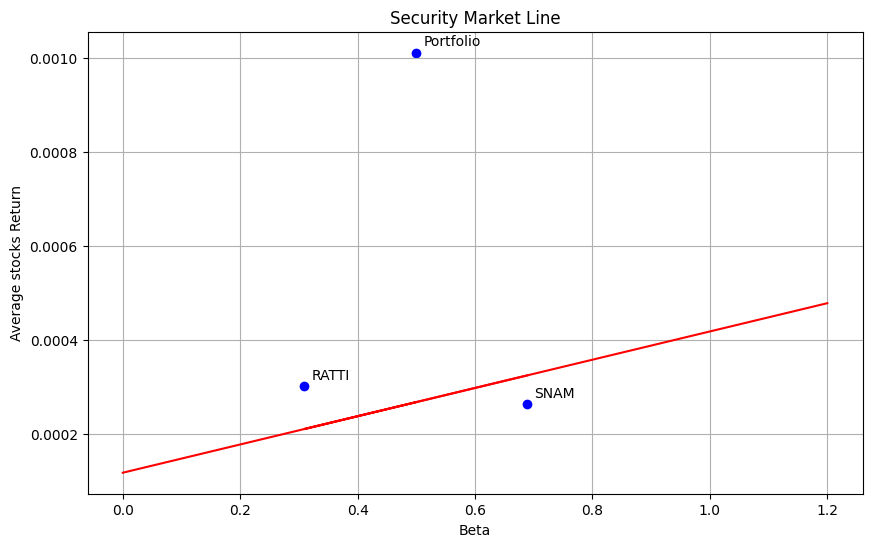

In [98]:
import matplotlib.pyplot as plt

# Given inputs
market_return = 0.00041825092610853996
risk_free_rate = 0.00011730371383444904
betas_daily = [0.68890341, 0.3092451, 0.5]
avg_portfolio_return = [0.000264, 0.000302, 0.001012]
stocks = ["SNAM", "RATTI", "Portfolio"]

# Enlarge the graph
plt.figure(figsize=(10, 6))

# Plot the Security Market Line with average portfolio returns
plt.scatter(betas_daily, avg_portfolio_return, color='blue', label='Avg Portfolio Return')
plt.plot(betas_daily, [risk_free_rate + beta * (market_return - risk_free_rate) for beta in betas_daily], color='red')
plt.plot([0, 1.2], [risk_free_rate, risk_free_rate + 1.2 * (market_return - risk_free_rate)], color='red')
plt.xlabel('Beta')
plt.ylabel('Average stocks Return')
plt.title('Security Market Line')

# Add annotations for each stock
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas_daily[i], avg_portfolio_return[i]), textcoords="offset points", xytext=(5, 5), ha='left')

plt.grid(True)
plt.show()

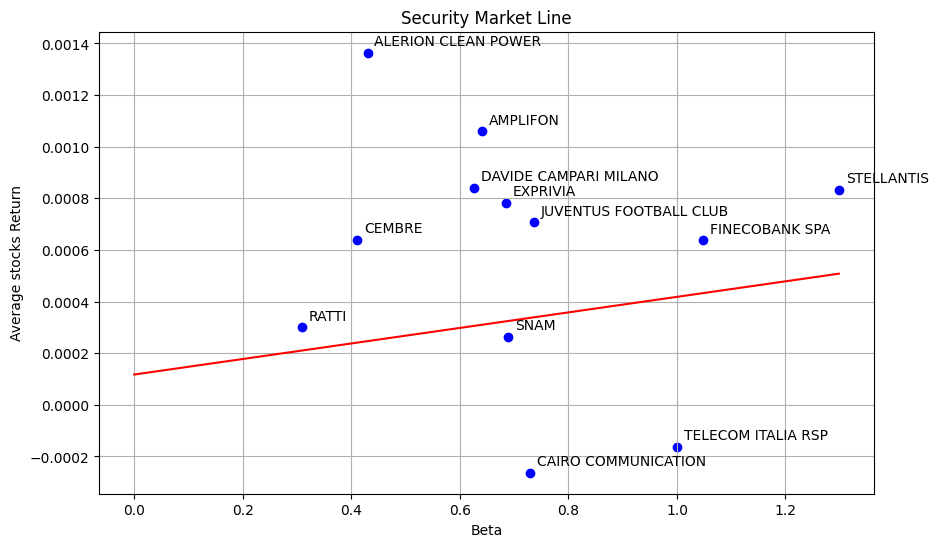

In [99]:
import matplotlib.pyplot as plt

# Given inputs
market_return = 0.00041825092610853996
risk_free_rate = 0.00011730371383444904
betas_daily = betas_d
avg_portfolio_return = avg_return_d
stocks = ["ALERION CLEAN POWER", "FINECOBANK SPA", "STELLANTIS", "AMPLIFON",
          "EXPRIVIA", "CEMBRE", "SNAM", "DAVIDE CAMPARI MILANO", "CAIRO COMMUNICATION",
          "TELECOM ITALIA RSP", "RATTI", "JUVENTUS FOOTBALL CLUB"]
# Enlarge the graph
plt.figure(figsize=(10, 6))

# Plot the Security Market Line with average portfolio returns
plt.scatter(betas_daily, avg_portfolio_return, color='blue', label='Avg Portfolio Return')
plt.plot([0, max(betas_daily)], [risk_free_rate, risk_free_rate + max(betas_daily) * (market_return - risk_free_rate)], color='red')
plt.xlabel('Beta')
plt.ylabel('Average stocks Return')
plt.title('Security Market Line')

# Add annotations for each stock
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas_daily[i], avg_portfolio_return[i]), textcoords="offset points", xytext=(5, 5), ha='left')

plt.grid(True)
plt.show()



In [100]:
#monthly

In [101]:
avg_return_m = returns_sel_m.mean()

In [102]:
# I convert 3% annual to monthly, because my average fund is monthly
annual_return = 0.03
rf_m = (1 + annual_return) ** (1 / 12) - 1
print("Monthly return:", rf_m)

Monthly return: 0.0024662697723036864


In [103]:
market_return_f_m = returns_monthly_f.mean()
market_return_f_m

0.008753862333814453

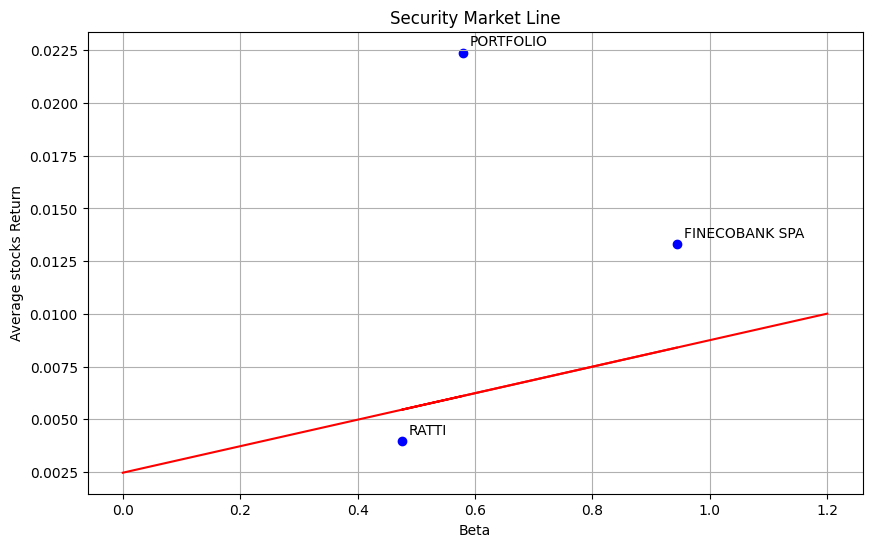

In [104]:
import matplotlib.pyplot as plt

# Given inputs
market_return = market_return_f_m
risk_free_rate = rf_m
betas_monthly = [0.94372502,0.47523262, portfolio_beta]
avg_portfolio_return = [0.013305,0.003975, 0.022385]
stocks = ["FINECOBANK SPA","RATTI","PORTFOLIO" ]
# Enlarge the graph
plt.figure(figsize=(10, 6))

# Plot the Security Market Line with average portfolio returns
plt.scatter(betas_monthly, avg_portfolio_return, color='blue')
plt.plot(betas_monthly, [risk_free_rate + beta * (market_return - risk_free_rate) for beta in betas_monthly], color='red')
plt.plot([0, 1.2], [risk_free_rate, risk_free_rate + 1.2 * (market_return - risk_free_rate)], color='red')
plt.xlabel('Beta')
plt.ylabel('Average stocks Return')
plt.title('Security Market Line')

# Add annotations for each stock
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas_monthly[i], avg_portfolio_return[i]), textcoords="offset points", xytext=(5, 5), ha='left')

plt.grid(True)
plt.show()

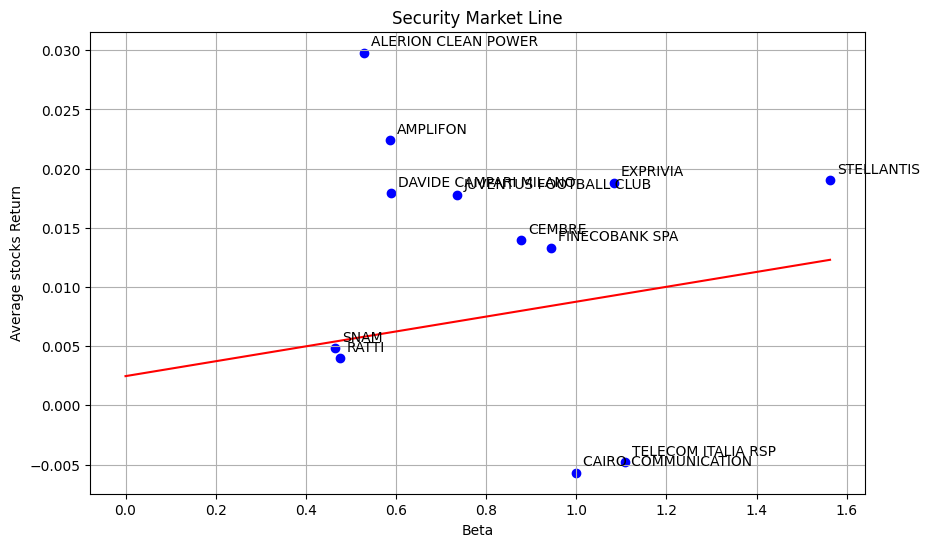

In [105]:
import matplotlib.pyplot as plt

# Given inputs
market_return = market_return_f_m
risk_free_rate = rf_m
betas_monthly = betas_m 
avg_portfolio_return = avg_return_m
stocks = ["ALERION CLEAN POWER", "FINECOBANK SPA", "STELLANTIS", "AMPLIFON",
          "EXPRIVIA", "CEMBRE", "SNAM", "DAVIDE CAMPARI MILANO", "CAIRO COMMUNICATION",
          "TELECOM ITALIA RSP", "RATTI", "JUVENTUS FOOTBALL CLUB"]
# Enlarge the graph
plt.figure(figsize=(10, 6))

# Plot the Security Market Line with average portfolio returns
plt.scatter(betas_monthly, avg_portfolio_return, color='blue')
plt.plot([0, max(betas_monthly)], [risk_free_rate, risk_free_rate + max(betas_monthly) * (market_return - risk_free_rate)], color='red')
plt.xlabel('Beta')
plt.ylabel('Average stocks Return')
plt.title('Security Market Line')

# Add annotations for each stock
for i, stock in enumerate(stocks):
    plt.annotate(stock, (betas_monthly[i], avg_portfolio_return[i]), textcoords="offset points", xytext=(5, 5), ha='left')

plt.grid(True)
plt.show()


In [106]:
#ELEVENTH POINT COMPLETED

Black-Litterman Allocation

In [107]:
#TWELFTH POINT STARTED

In [108]:
#Usual Suspects
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Use PyPortfolioOpt for Calculations
from pypfopt import EfficientFrontier, objective_functions
from pypfopt import black_litterman, risk_models
from pypfopt import BlackLittermanModel, plotting
from pypfopt import DiscreteAllocation

In [109]:
#DAILY

In [110]:
portfolio = cleaned_df_daily_sel
portfolio

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,2.816,4.668,4.9744,4.904,0.7145,10.21,3.3841,2.58,4.854,0.6935,2.4,0.1624
2015-01-02,2.832,4.74,5.0132,4.9,0.703,10.4,3.3642,2.5225,4.952,0.6965,2.4,0.1646
2015-01-05,2.83,4.652,4.9044,5.025,0.698,10.43,3.252,2.465,4.808,0.6795,2.32,0.1641
2015-01-06,2.8,4.6,4.9822,5.025,0.702,10.59,3.2371,2.5225,4.72,0.683,2.38,0.1632
2015-01-07,2.826,4.516,5.0262,5.16,0.696,10.43,3.2388,2.5475,4.71,0.681,2.366,0.1608
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-28,28.2,12.165,15.47,32.58,1.576,29.4,4.745,12.48,1.65,0.2513,2.83,0.3338
2023-06-29,28.4,12.165,16.02,33.25,1.58,29.6,4.771,12.505,1.664,0.2488,2.92,0.34
2023-06-30,28.6,12.315,16.09,33.59,1.574,30.6,4.787,12.69,1.652,0.2496,2.98,0.343


In [111]:
market_prices = cleaned_funds_daily_f.iloc[:, 3]
market_prices

price_date
2015-01-01    24979.66
2015-01-02    25150.98
2015-01-05    24026.63
2015-01-06    23941.42
2015-01-07    23903.53
                ...   
2023-06-28    49770.43
2023-06-29    50252.19
2023-06-30    50783.36
2023-07-03    51121.09
2023-07-04    51024.43
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, Length: 2219, dtype: object

In [112]:
"""
cov_matrix is a NxN sample covariance matrix
mcaps is a dict of market caps. Black and Litterman (1991) provide the insight that a natural choice for this prior is the market’s estimate of the return, which is embedded into the market capitalisation of the asset.
market_prices is a series of S&P500 prices
"""
mcaps = {
    "ALERION CLEAN POWER": 1526557694,
    "FINECOBANK SPA": 8032859158,
    "STELLANTIS": 52465678746,
    "AMPLIFON": 6866366845,
    "EXPRIVIA": 81769118,
    "CEMBRE": 506600000,
    "SNAM": 15631349670,
    "DAVIDE CAMPARI MILANO": 14496768000,
    "CAIRO COMMUNICATION": 225013385,
    "TELECOM ITALIA RSP": 3944271729,
    "RATTI": 78494500,
    "JUVENTUS FOOTBALL CLUB": 915958306,
}
mcaps

{'ALERION CLEAN POWER': 1526557694,
 'FINECOBANK SPA': 8032859158,
 'STELLANTIS': 52465678746,
 'AMPLIFON': 6866366845,
 'EXPRIVIA': 81769118,
 'CEMBRE': 506600000,
 'SNAM': 15631349670,
 'DAVIDE CAMPARI MILANO': 14496768000,
 'CAIRO COMMUNICATION': 225013385,
 'TELECOM ITALIA RSP': 3944271729,
 'RATTI': 78494500,
 'JUVENTUS FOOTBALL CLUB': 915958306}

In [113]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio).ledoit_wolf() 

delta = black_litterman.market_implied_risk_aversion(market_prices)
delta


1.784988388072854

In [114]:
market_prior = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior


ALERION CLEAN POWER       0.061021
FINECOBANK SPA            0.113632
STELLANTIS                0.187920
AMPLIFON                  0.086886
EXPRIVIA                  0.079003
CEMBRE                    0.057479
SNAM                      0.079148
DAVIDE CAMPARI MILANO     0.084426
CAIRO COMMUNICATION       0.080951
TELECOM ITALIA RSP        0.107356
RATTI                     0.049020
JUVENTUS FOOTBALL CLUB    0.089062
dtype: float64

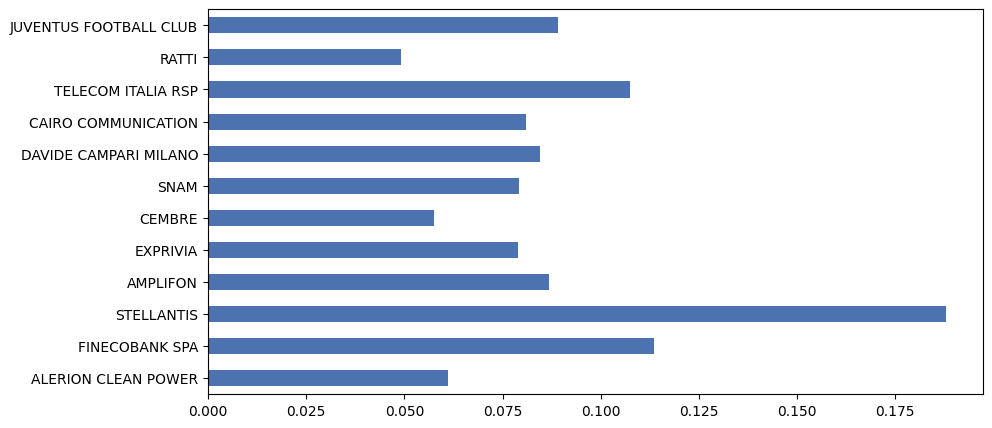

In [115]:
market_prior.plot.barh(figsize=(10,5));
#this does not include any expertise in the matter (any opinion)

In [116]:
views = np.array([-0.005, +0.005, 0.007, +0.08]).reshape(-1, 1)

In [117]:
#picking matrix
#The picking matrix is more interesting. Remember that its role is to link the views (which mention 8 assets) to the universe of 10 assets. Arguably, this is the most important part of the model because it is what allows us to propagate our expectations (and confidences in expectations) into the model:
picking = np.array(
    [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0],
    ]
)

#Each view has a corresponding row in the picking matrix (the order matters). In our case we have 4 raws
#Absolute views have a single 1 in the column corresponding to the ticker’s order in the universe. In our case Alerion
#Relative views have a positive number in the nominally outperforming asset columns and a negative number in the nominally underperforming asset columns. The numbers in each row should sum up to 0.
bl = BlackLittermanModel(S, Q=views, P=picking, pi=market_prior)


In [118]:
#create confidences
#we can calculate the uncertainty matrix directly by specifying 1 standard deviation confidence intervals, i.e bounds which we think will contain the true return 68% of the time. This may be easier than coming up with somewhat arbitrary percentage confidences
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (0.1, 0.15),
    (0.1, 0.4),
]


In [119]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)
omega

[0.015625, 0.022500000000000006, 0.0006249999999999997, 0.022500000000000006]


array([[0.015625, 0.      , 0.      , 0.      ],
       [0.      , 0.0225  , 0.      , 0.      ],
       [0.      , 0.      , 0.000625, 0.      ],
       [0.      , 0.      , 0.      , 0.0225  ]])

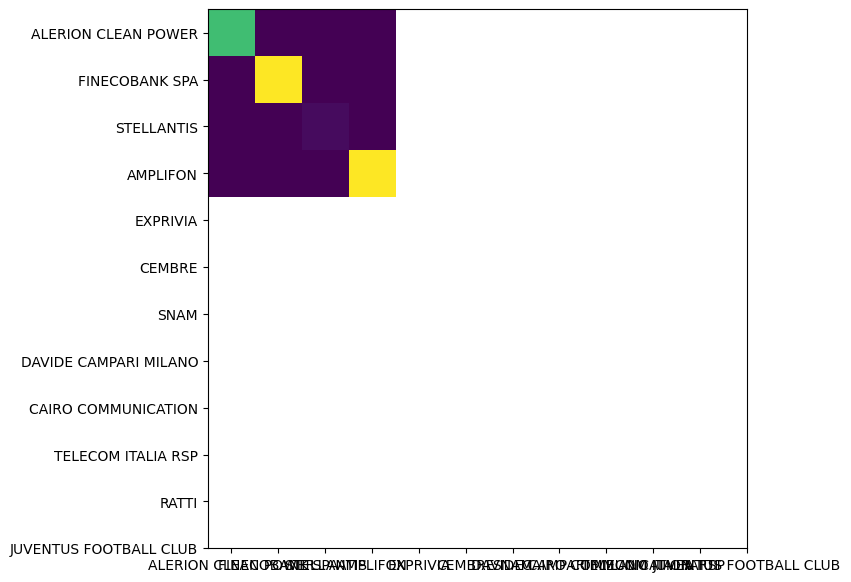

In [120]:
#Calculate Posterior Estimate Returns
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [121]:
#compute market-implied prior
bl = BlackLittermanModel(S, Q=views, P=picking, pi="market", market_caps=mcaps, risk_aversion=delta, omega=omega)

In [122]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

ALERION CLEAN POWER       0.081879
FINECOBANK SPA            0.060259
STELLANTIS                0.079331
AMPLIFON                  0.047521
EXPRIVIA                  0.037635
CEMBRE                    0.035508
SNAM                      0.042226
DAVIDE CAMPARI MILANO     0.034842
CAIRO COMMUNICATION       0.038094
TELECOM ITALIA RSP        0.054448
RATTI                     0.019798
JUVENTUS FOOTBALL CLUB    0.042795
dtype: float64

In [123]:
rets_df = pd.DataFrame([market_prior, ret_bl], 
             index=["Prior", "Posterior"]).T
rets_df

,Prior,Posterior
ALERION CLEAN POWER,0.061021,0.081879
FINECOBANK SPA,0.113632,0.060259
STELLANTIS,0.187920,0.079331
AMPLIFON,0.086886,0.047521
EXPRIVIA,0.079003,0.037635
CEMBRE,0.057479,0.035508
SNAM,0.079148,0.042226
DAVIDE CAMPARI MILANO,0.084426,0.034842
CAIRO COMMUNICATION,0.080951,0.038094
TELECOM ITALIA RSP,0.107356,0.054448


In [124]:
#rets_df.plot.bar(figsize=(12,8));

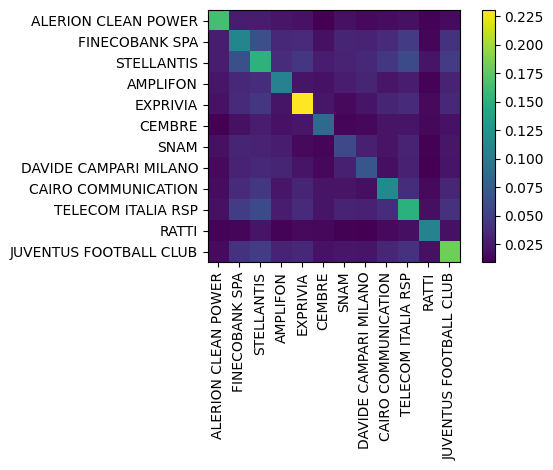

In [125]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [126]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('ALERION CLEAN POWER', 0.21374),
             ('FINECOBANK SPA', 0.12426),
             ('STELLANTIS', 0.19216),
             ('AMPLIFON', 0.08273),
             ('EXPRIVIA', 0.03787),
             ('CEMBRE', 0.04501),
             ('SNAM', 0.06762),
             ('DAVIDE CAMPARI MILANO', 0.03639),
             ('CAIRO COMMUNICATION', 0.04387),
             ('TELECOM ITALIA RSP', 0.09956),
             ('RATTI', 0.0),
             ('JUVENTUS FOOTBALL CLUB', 0.05678)])

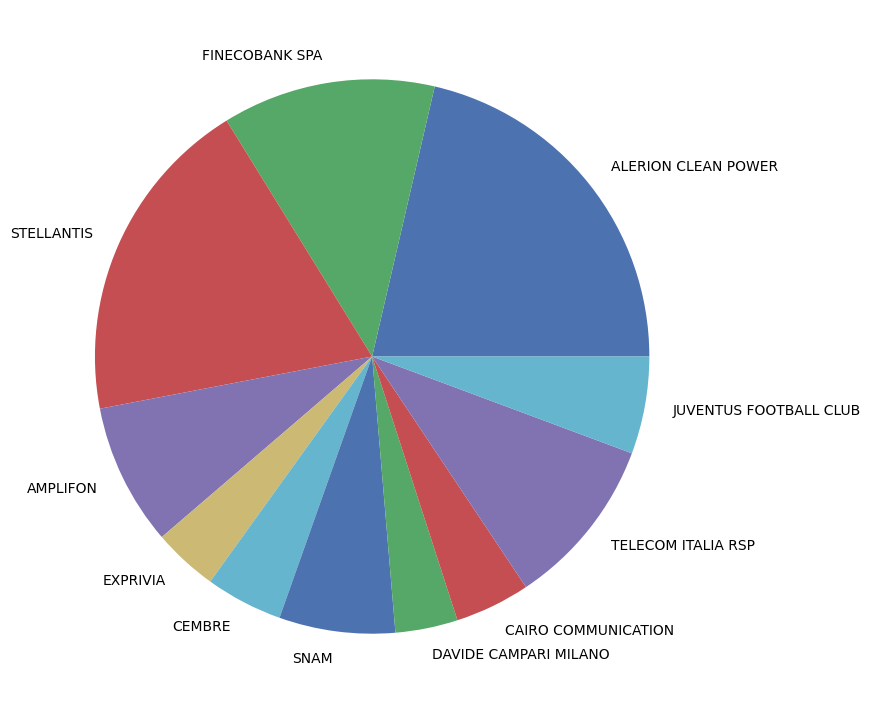

In [127]:
pd.Series(weights).plot.pie(figsize=(9,9));

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


Expected annual return: 6.1%
Annual volatility: 21.5%
Sharpe Ratio: 0.19
Skewness: -0.95091865
Kurtosis: 11.10999275


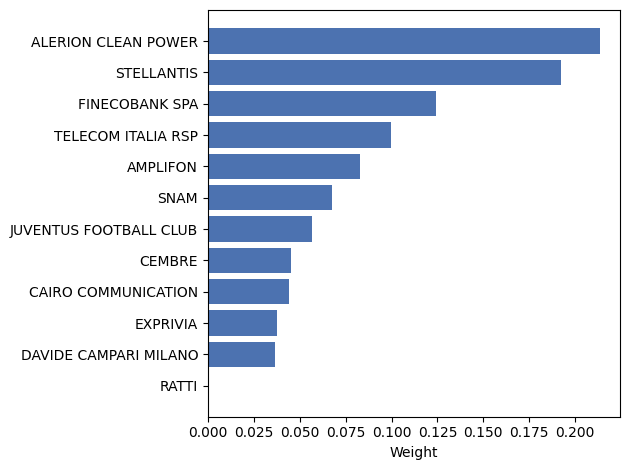

In [128]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.03)
df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weights'])
portfolio_return_d_bl = returns_sel_d @ df
portfolio_return_d_bl
bl_skewness = sc.skew(portfolio_return_d_bl[1:])
bl_kurtosis = sc.kurtosis(portfolio_return_d_bl[1:])
print(f"Skewness: {bl_skewness[0]:.8f}")
print(f"Kurtosis: {bl_kurtosis[0]:.8f}")


In [129]:
#MONTHLY

In [130]:
portfolio_m = cleaned_df_monthly_sel
portfolio_m

,ALERION CLEAN POWER,FINECOBANK SPA,STELLANTIS,AMPLIFON,EXPRIVIA,CEMBRE,SNAM,DAVIDE CAMPARI MILANO,CAIRO COMMUNICATION,TELECOM ITALIA RSP,RATTI,JUVENTUS FOOTBALL CLUB
price_date,,,,,,,,,,,,
2015-01-01,2.816,4.668,4.9744,4.904,0.7145,10.21,3.3841,2.58,4.854,0.6935,2.4,0.1624
2015-02-01,2.542,4.836,6.0833,5.185,0.8005,11.51,3.5739,3.0075,5.62,0.8155,2.46,0.1712
2015-03-01,2.746,5.71,7.3061,5.725,0.82,11.77,3.734,3.025,5.74,0.882,2.648,0.176
2015-04-01,3.05,6.465,7.8347,6.345,0.8555,14.46,3.7967,3.37,5.395,0.8685,2.5,0.1926
2015-05-01,3.018,6.74,6.9175,6.97,0.823,14.46,3.843,3.455,5.195,0.86,2.57,0.2245
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-01,30.1,16.1,17.056,27.11,1.568,29.4,4.569,10.455,1.748,0.3003,3,0.3026
2023-04-01,29.35,13.915,16.67,31.83,1.4,30.5,4.903,11.295,1.84,0.3014,2.93,0.339
2023-05-01,29.2,13.73,15,33.28,1.32,30.3,5.04,11.68,1.824,0.262,2.78,0.2894


In [131]:
market_prices_m= cleaned_funds_monthly_f.iloc[:, 3]
market_prices_m

price_date
2015-01-01    24979.66
2015-02-01    27005.46
2015-03-01    29436.23
2015-04-01     30945.6
2015-05-01       30586
                ...   
2023-03-01    48109.69
2023-04-01    47861.25
2023-05-01    48245.64
2023-06-01    47922.53
2023-07-01    51121.09
Name: FTSE ITALIA ALL SHARE - TOT RETURN IND, Length: 103, dtype: object

In [132]:
mcaps

{'ALERION CLEAN POWER': 1526557694,
 'FINECOBANK SPA': 8032859158,
 'STELLANTIS': 52465678746,
 'AMPLIFON': 6866366845,
 'EXPRIVIA': 81769118,
 'CEMBRE': 506600000,
 'SNAM': 15631349670,
 'DAVIDE CAMPARI MILANO': 14496768000,
 'CAIRO COMMUNICATION': 225013385,
 'TELECOM ITALIA RSP': 3944271729,
 'RATTI': 78494500,
 'JUVENTUS FOOTBALL CLUB': 915958306}

In [133]:
#Calculate Sigma and Delta to get implied market returns
#Ledoit-Wolf is a particular form of shrinkage, where the shrinkage coefficient is computed using O?
S = risk_models.CovarianceShrinkage(portfolio_m).ledoit_wolf() 

delta = black_litterman.market_implied_risk_aversion(market_prices_m)
delta


2.568825512001675

In [134]:
market_prior_m = black_litterman.market_implied_prior_returns(mcaps, delta, S)
market_prior_m

ALERION CLEAN POWER       1.067435
FINECOBANK SPA            2.106158
STELLANTIS                5.189550
AMPLIFON                  1.718226
EXPRIVIA                  1.953563
CEMBRE                    1.793770
SNAM                      1.148708
DAVIDE CAMPARI MILANO     1.562388
CAIRO COMMUNICATION       1.871617
TELECOM ITALIA RSP        1.922176
RATTI                     0.764432
JUVENTUS FOOTBALL CLUB    2.291591
dtype: float64

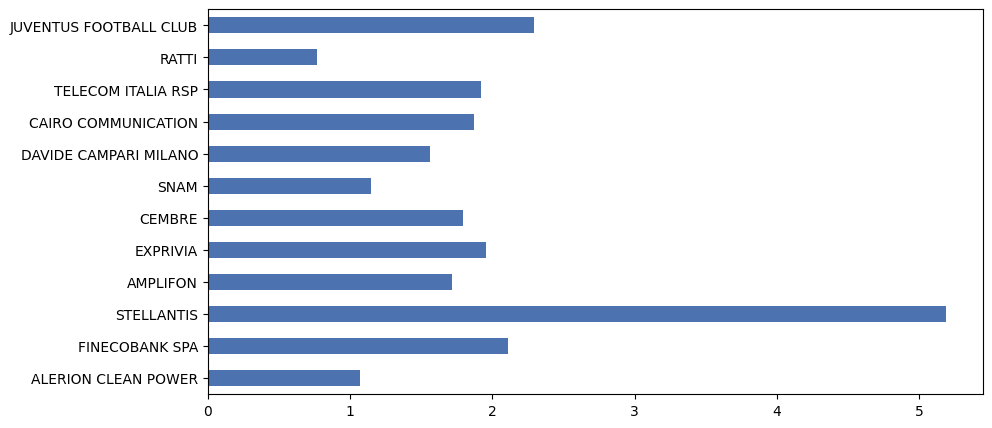

In [135]:
#What am I looking at here? How much are we compensated in terms of returns for the risk we are taking?
market_prior_m.plot.barh(figsize=(10,5));
#this does not include any expertise in the matter (any opinion)

In [136]:
views = np.array([-0.05, +0.05, 0.07, +0.5]).reshape(-1, 1)

In [137]:
#picking matrix
#The picking matrix is more interesting. Remember that its role is to link the views (which mention 8 assets) to the universe of 10 assets. Arguably, this is the most important part of the model because it is what allows us to propagate our expectations (and confidences in expectations) into the model:
picking = np.array(
    [
        [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [1, 0, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, -1, 0, 0, 0, 0],
    ]
)

#Each view has a corresponding row in the picking matrix (the order matters). In our case we have 4 raws
#Absolute views have a single 1 in the column corresponding to the ticker’s order in the universe. In our case Alerion
#Relative views have a positive number in the nominally outperforming asset columns and a negative number in the nominally underperforming asset columns. The numbers in each row should sum up to 0.
bl = BlackLittermanModel(S, Q=views, P=picking, pi=market_prior_m)

In [138]:
#create confidences
intervals = [
    (0, 0.25),
    (0.1, 0.4),
    (0.1, 0.15),
    (0.1, 0.4),
]


In [139]:
variances = []
for lb, ub in intervals:
    sigma = (ub - lb)/2
    variances.append(sigma ** 2)

print(variances)
omega = np.diag(variances)
omega

[0.015625, 0.022500000000000006, 0.0006249999999999997, 0.022500000000000006]


array([[0.015625, 0.      , 0.      , 0.      ],
       [0.      , 0.0225  , 0.      , 0.      ],
       [0.      , 0.      , 0.000625, 0.      ],
       [0.      , 0.      , 0.      , 0.0225  ]])

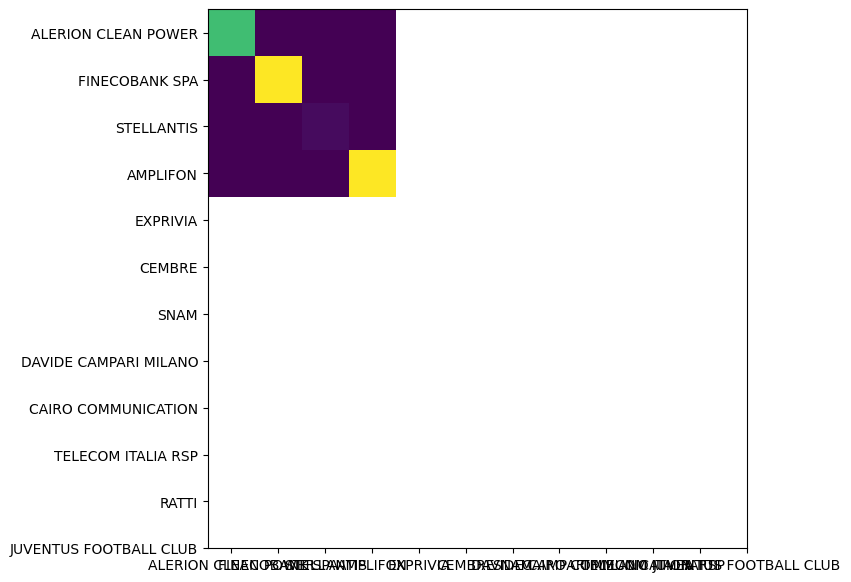

In [140]:
#Calculate Posterior Estimate Returns
fig, ax = plt.subplots(figsize=(7,7))
im = ax.imshow(omega)

# We want to show all ticks...
ax.set_xticks(np.arange(len(bl.tickers)))
ax.set_yticks(np.arange(len(bl.tickers)))

ax.set_xticklabels(bl.tickers)
ax.set_yticklabels(bl.tickers)
plt.show()

In [141]:
#compute market-implied prior
bl = BlackLittermanModel(S, Q=views, P=picking, pi="market", market_caps=mcaps, risk_aversion=delta, omega=omega)

In [142]:
# Posterior estimate of returns
ret_bl = bl.bl_returns()
ret_bl

ALERION CLEAN POWER       0.444395
FINECOBANK SPA            0.638786
STELLANTIS                0.374607
AMPLIFON                  0.563371
EXPRIVIA                  0.521449
CEMBRE                    0.622097
SNAM                      0.524942
DAVIDE CAMPARI MILANO     0.202276
CAIRO COMMUNICATION       0.491654
TELECOM ITALIA RSP        0.518649
RATTI                     0.283988
JUVENTUS FOOTBALL CLUB    0.458057
dtype: float64

In [143]:
rets_df = pd.DataFrame([market_prior_m, ret_bl], 
             index=["Prior", "Posterior"]).T
rets_df

,Prior,Posterior
ALERION CLEAN POWER,1.067435,0.444395
FINECOBANK SPA,2.106158,0.638786
STELLANTIS,5.189550,0.374607
AMPLIFON,1.718226,0.563371
EXPRIVIA,1.953563,0.521449
CEMBRE,1.793770,0.622097
SNAM,1.148708,0.524942
DAVIDE CAMPARI MILANO,1.562388,0.202276
CAIRO COMMUNICATION,1.871617,0.491654
TELECOM ITALIA RSP,1.922176,0.518649


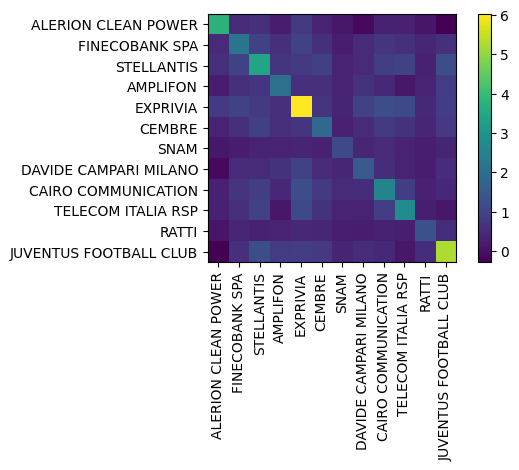

In [144]:
S_bl = bl.bl_cov()
plotting.plot_covariance(S_bl);

In [145]:
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()
weights

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(


OrderedDict([('ALERION CLEAN POWER', 0.08014),
             ('FINECOBANK SPA', 0.16366),
             ('STELLANTIS', 0.0),
             ('AMPLIFON', 0.14387),
             ('EXPRIVIA', 0.00449),
             ('CEMBRE', 0.16537),
             ('SNAM', 0.24728),
             ('DAVIDE CAMPARI MILANO', 0.0),
             ('CAIRO COMMUNICATION', 0.03582),
             ('TELECOM ITALIA RSP', 0.0953),
             ('RATTI', 0.03561),
             ('JUVENTUS FOOTBALL CLUB', 0.02846)])

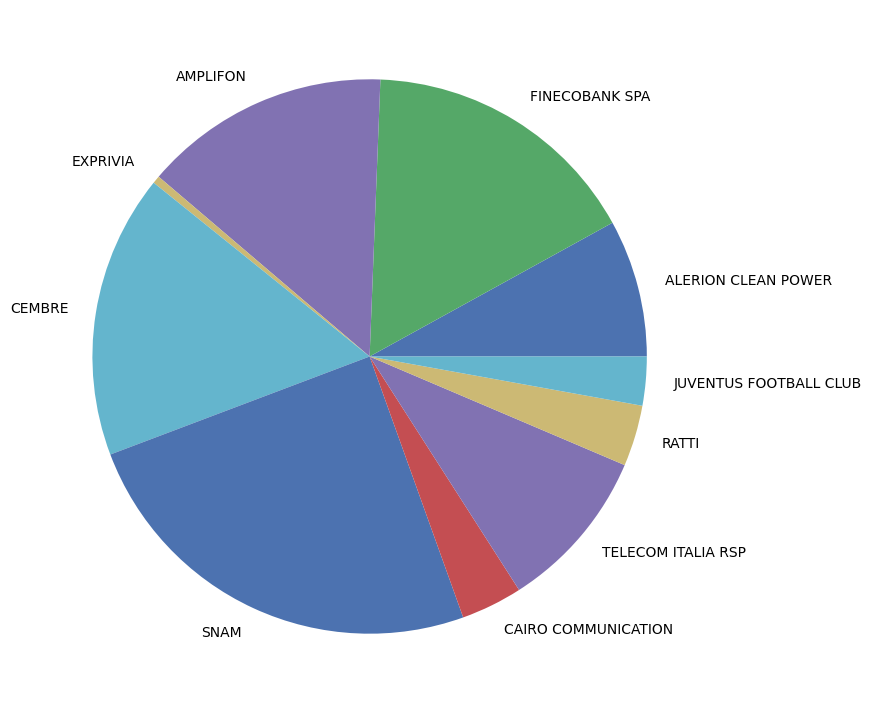

In [146]:
pd.Series(weights).plot.pie(figsize=(9,9));

c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:259: UserWarning: max_sharpe transforms the optimization problem so additional objectives may not work as expected.
  warnings.warn(
c:\Users\david\AppData\Local\Programs\Python\Python310\lib\site-packages\pypfopt\efficient_frontier\efficient_frontier.py:441: UserWarning: The risk_free_rate provided to portfolio_performance is different to the one used by max_sharpe. Using the previous value.
  warnings.warn(


Expected annual return: 54.6%
Annual volatility: 78.6%
Sharpe Ratio: 0.67
Skewness: -0.56467008
Kurtosis: 1.39548732


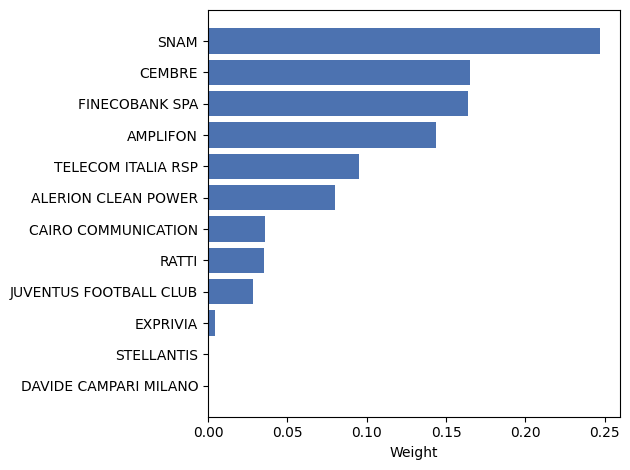

In [147]:
from pypfopt.plotting import plot_weights

# Maximum Sharpe
ef = EfficientFrontier(ret_bl, S_bl)
ef.add_objective(objective_functions.L2_reg)
ef.max_sharpe()
weights = ef.clean_weights()

plot_weights(weights)
ef.portfolio_performance(verbose = True, risk_free_rate = 0.03)
df = pd.DataFrame.from_dict(weights, orient='index', columns=['Weights'])
portfolio_return_m_bl = returns_sel_m @ df
portfolio_return_m_bl
bl_skewness = sc.skew(portfolio_return_m_bl[1:])
bl_kurtosis = sc.kurtosis(portfolio_return_m_bl[1:])
print(f"Skewness: {bl_skewness[0]:.8f}")
print(f"Kurtosis: {bl_kurtosis[0]:.8f}")


In [148]:
#TWELFTH POINT COMPLETED

Bayesian Asset Allocation

In [149]:
#THIRTEENTH POINT STARTED

In [150]:
#daily

In [151]:
returns = cleaned_df_daily_sel.pct_change().dropna()*100

In [152]:
returns_mean = returns.mean()
returns_std = returns.std()

In [153]:
prior_mean = returns_mean + 1 * returns_std
#prior_std = returns_std
covariance_matrix = returns.cov()
prior_covariance_matrix = covariance_matrix * 2
prior_covariance_matrix
prior_std = np.sqrt(np.diag(prior_covariance_matrix))
prior_std

array([3.58503476, 2.89524707, 3.44597717, 2.8470622 , 4.20028146,
       2.52742736, 2.0738458 , 2.25829836, 2.95498027, 3.3909775 ,
       2.84990533, 3.72307875])

In [154]:
prior_mean 

ALERION CLEAN POWER       2.671429
FINECOBANK SPA            2.111047
STELLANTIS                2.520017
AMPLIFON                  2.119189
EXPRIVIA                  3.048386
CEMBRE                    1.851102
SNAM                      1.492821
DAVIDE CAMPARI MILANO     1.681028
CAIRO COMMUNICATION       2.063168
TELECOM ITALIA RSP        2.381513
RATTI                     2.045339
JUVENTUS FOOTBALL CLUB    2.703393
dtype: float64

In [155]:
posterior_mean = prior_mean
posterior_covariance_matrix = np.linalg.inv(np.linalg.inv(prior_covariance_matrix) + returns.shape[0] * np.linalg.inv(covariance_matrix))

In [156]:
weights = np.dot(posterior_covariance_matrix, posterior_mean) / np.sum(np.dot(posterior_covariance_matrix, posterior_mean))
weights

array([0.07657957, 0.09616911, 0.11935643, 0.0755214 , 0.11832358,
       0.05393407, 0.05729335, 0.06089379, 0.08094322, 0.10366835,
       0.05086306, 0.10645406])

In [157]:
portfolio_mean = np.dot(weights, returns_mean)
portfolio_std = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights)))
portfolio_variance = portfolio_std ** 2
portfolio_skewness = np.dot(weights, np.dot(returns.skew(), weights))
portfolio_kurtosis = np.dot(weights, np.dot(returns.kurtosis(), weights))
sharpe_ratio = (portfolio_mean-0.03) / portfolio_std

# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {portfolio_mean:.4f}")
print(f"Volatility: {portfolio_std:.4f}")
print(f"Variance: {portfolio_variance:.4f}")
print(f"Skewness: {portfolio_skewness[0]:.8f}")
print(f"Kurtosis: {portfolio_kurtosis[0]:.8f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Optimal Portfolio:
Expected Return: 0.0591
Volatility: 1.2608
Variance: 1.5896
Skewness: 0.02326260
Kurtosis: 0.72474450
Sharpe Ratio: 0.0231


In [158]:
#monthly

In [159]:
returns = cleaned_df_monthly_sel.pct_change().dropna()*100

In [160]:
returns_mean = returns.mean()
returns_std = returns.std()

In [161]:
prior_mean = returns_mean + 1 * returns_std
#prior_std = returns_std
covariance_matrix = returns.cov()
prior_covariance_matrix = covariance_matrix * 2
prior_std = np.sqrt(np.diag(prior_covariance_matrix))
prior_std

array([17.90108804, 12.34926884, 16.96723293, 12.01519202, 22.80479029,
       11.49412467,  7.33716236,  9.66213136, 13.88638636, 14.49643809,
        8.513148  , 21.13832411])

In [162]:
prior_mean

ALERION CLEAN POWER       15.636798
FINECOBANK SPA            10.062753
STELLANTIS                13.897981
AMPLIFON                  10.737836
EXPRIVIA                  18.007394
CEMBRE                     9.520859
SNAM                       5.669063
DAVIDE CAMPARI MILANO      8.626312
CAIRO COMMUNICATION        9.249751
TELECOM ITALIA RSP         9.770665
RATTI                      6.417186
JUVENTUS FOOTBALL CLUB    16.723715
dtype: float64

In [163]:
posterior_mean = prior_mean
posterior_covariance_matrix = np.linalg.inv(np.linalg.inv(prior_covariance_matrix) + returns.shape[0] * np.linalg.inv(covariance_matrix))

In [164]:
weights = np.dot(posterior_covariance_matrix, posterior_mean) / np.sum(np.dot(posterior_covariance_matrix, posterior_mean))
weights

array([0.07361013, 0.08184975, 0.11651722, 0.06719932, 0.1630786 ,
       0.07686155, 0.03801925, 0.05785399, 0.08685242, 0.07592257,
       0.04080932, 0.1214259 ])

In [165]:
portfolio_mean = np.dot(weights, returns_mean)
portfolio_std = np.sqrt(np.dot(weights, np.dot(covariance_matrix, weights)))
portfolio_variance = portfolio_std ** 2
portfolio_skewness = np.dot(weights, np.dot(returns.skew(), weights))
portfolio_kurtosis = np.dot(weights, np.dot(returns.kurtosis(), weights))
sharpe_ratio = (portfolio_mean-0.03) / portfolio_std

# Print the optimal portfolio expected return and volatility
print("Optimal Portfolio:")
print(f"Expected Return: {portfolio_mean:.4f}")
print(f"Volatility: {portfolio_std:.4f}")
print(f"Variance: {portfolio_variance:.4f}")
print(f"Skewness: {portfolio_skewness[0]:.8f}")
print(f"Kurtosis: {portfolio_kurtosis[0]:.8f}")
print(f"Sharpe Ratio: {sharpe_ratio:.4f}")

Optimal Portfolio:
Expected Return: 1.3824
Volatility: 6.5983
Variance: 43.5377
Skewness: 0.04892175
Kurtosis: 0.29542480
Sharpe Ratio: 0.2050


In [166]:
#THIRTEENTH POINT COMPLETED

Global Minimum Portfolio Variance

In [194]:
#FOURTEENTH POINT STARTED

In [195]:
#daily

In [196]:
mu=(returns_sel_d*100).mean()
S=(returns_sel_d*100).cov()

In [197]:
ef = EfficientFrontier(mu, S)  # setup
#ef.add_objective(objective_functions.L2_reg)  # add a secondary objective
ef.min_volatility()  # find the portfolio that minimises volatility and L2_reg

OrderedDict([('ALERION CLEAN POWER', 0.0801393982050035),
             ('FINECOBANK SPA', 0.0004412100819038),
             ('STELLANTIS', 0.0),
             ('AMPLIFON', 0.0483150113578296),
             ('EXPRIVIA', 0.031405190771148),
             ('CEMBRE', 0.1823436402027916),
             ('SNAM', 0.230500175168027),
             ('DAVIDE CAMPARI MILANO', 0.1646298924320902),
             ('CAIRO COMMUNICATION', 0.07326396241113),
             ('TELECOM ITALIA RSP', 0.0),
             ('RATTI', 0.1621109587042116),
             ('JUVENTUS FOOTBALL CLUB', 0.0268505606658645)])

In [198]:
weights = [0.0801393982050035, 0.0004412100819038, 0.0, 0.0483150113578296, 0.031405190771148, 0.1823436402027916, 0.230500175168027, 0.1646298924320902, 0.07326396241113, 0.0, 0.1621109587042116, 0.0268505606658645]
return_portfolio = returns_sel_d @ weights
skewness = sc.skew(return_portfolio[1:])
kurtosis = sc.kurtosis(return_portfolio[1:])

In [199]:
cla = CLA(mu, S)
cla.min_volatility()
cla.portfolio_performance(verbose=True);
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Expected annual return: 5.5%
Annual volatility: 102.8%
Sharpe Ratio: 0.03
Skewness: -1.4831
Kurtosis: 19.4659


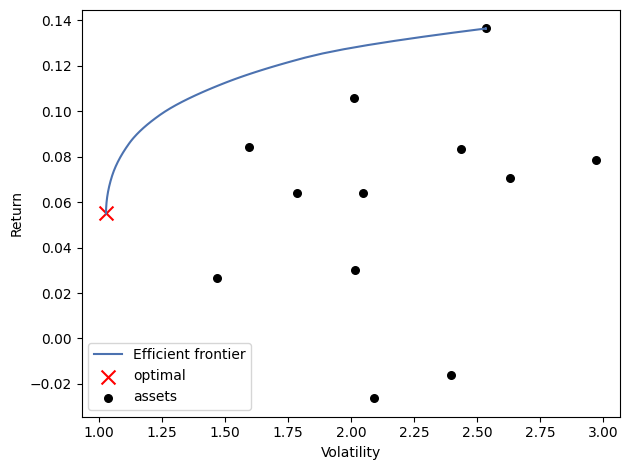

In [200]:
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [201]:
#monthly

In [202]:
mu=(returns_sel_m*100).mean()
S=(returns_sel_m*100).cov()

In [203]:
ef = EfficientFrontier(mu, S)  # setup
#ef.add_objective(objective_functions.L2_reg)  # add a secondary objective
ef.min_volatility()  # find the portfolio that minimises volatility

OrderedDict([('ALERION CLEAN POWER', 0.088362254170144),
             ('FINECOBANK SPA', 0.0187383118551547),
             ('STELLANTIS', 0.0),
             ('AMPLIFON', 0.0186122073756711),
             ('EXPRIVIA', 0.0),
             ('CEMBRE', 0.0043297905687234),
             ('SNAM', 0.4007386901422278),
             ('DAVIDE CAMPARI MILANO', 0.1374294519848461),
             ('CAIRO COMMUNICATION', 0.0),
             ('TELECOM ITALIA RSP', 0.0408212772837566),
             ('RATTI', 0.2909680166194765),
             ('JUVENTUS FOOTBALL CLUB', 0.0)])

In [210]:
weights = [0.0883622541701442, 0.0187383118551542, 0.0, 0.0186122073756708, 0.0, 0.0043297905687234, 0.4007386901422259, 0.1374294519848474, 0.0, 0.0408212772837567, 0.2909680166194772, 0.0]
return_portfolio = returns_sel_m @ weights
skewness = sc.skew(return_portfolio[1:])
kurtosis = sc.kurtosis(return_portfolio[1:])

In [211]:
cla = CLA(mu, S)
cla.min_volatility()
cla.portfolio_performance(verbose=True);
print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}")

Expected annual return: 87.1%
Annual volatility: 433.7%
Sharpe Ratio: 0.20
Skewness: -0.3698
Kurtosis: 1.0349


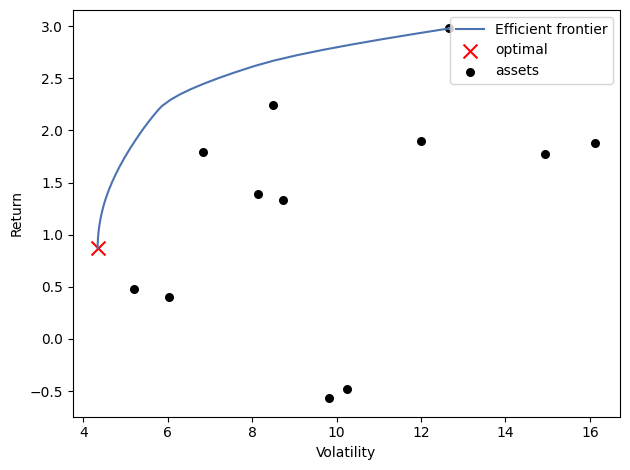

In [206]:
#optimal refers to the GMVP
ax = plotting.plot_efficient_frontier(cla, showfig=False)

In [207]:
#FOURTEENTH POINT COMPLETED